SIMPLE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1 step load the dataset
df= pd.read_csv('weight-height.csv')

In [3]:
df = df.rename(columns={'Height':'height','Weight':'weight'})

In [4]:
df.head()

,Gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'height')

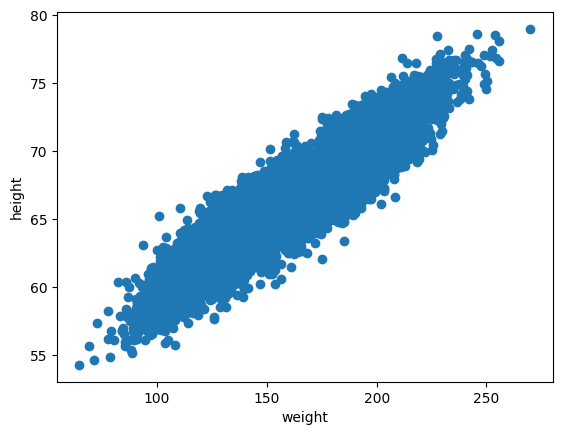

In [5]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('weight')
plt.ylabel('height')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   height  10000 non-null  float64
 2   weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
df["height"] = df["height"].astype(int)
df["weight"] = df["weight"].astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  10000 non-null  object
 1   height  10000 non-null  int64 
 2   weight  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [9]:
df.describe()

,height,weight
count,10000.000000,10000.000000
mean,65.866200,160.937700
std,3.860283,32.108169
min,54.000000,64.000000
25%,63.000000,135.000000
50%,66.000000,161.000000
75%,69.000000,187.000000
max,78.000000,269.000000


In [10]:
df.isnull().sum()

Gender    0
height    0
weight    0
dtype: int64

In [11]:
df.head()

,Gender,height,weight
0,Male,73,241
1,Male,68,162
2,Male,74,212
3,Male,71,220
4,Male,69,206


In [12]:
#divide the dataset - to dependent feature and independent feature
X = df[['weight']]
y = df[['height']]

In [13]:
X.shape,y.shape

((10000, 1), (10000, 1))

In [14]:
#divide the dataset into train and test data
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [16]:
X_train.shape,X_test.shape

((8000, 1), (2000, 1))

In [17]:
y_train.shape,y_test.shape

((8000, 1), (2000, 1))

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[ 0.3800427 ],
       [ 1.06664595],
       [ 0.28641498],
       ...,
       [-1.11800075],
       [ 0.81697204],
       [-1.83581323]], shape=(2000, 1))

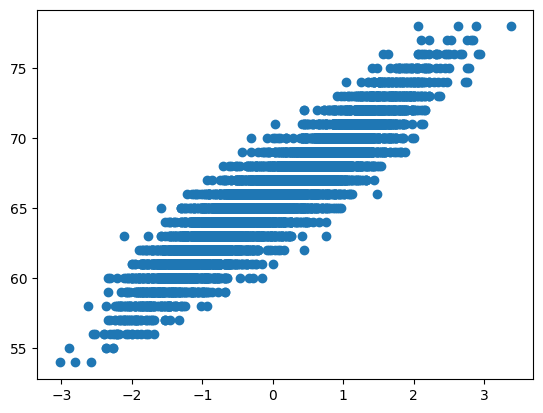

In [21]:
plt.scatter(X_train,y_train)

In [22]:
#model training
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
#training the dataset

regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
regressor.intercept_

array([65.85625])

In [26]:
regressor.coef_

array([[3.55499427]])

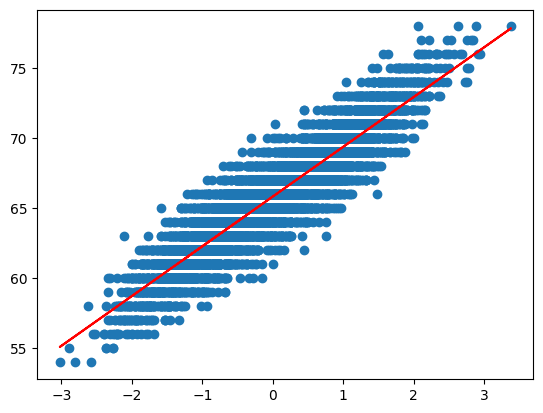

In [27]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')

In [28]:
#prediction for test data
y_pred_test = regressor.predict(X_test)

C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [29]:
y_pred_test

array([[680.87025952],
       [759.08013356],
       [670.20527669],
       ...,
       [510.23053433],
       [730.64017936],
       [428.46566601]], shape=(2000, 1))

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

341578.8888920742
573.7174384437957
584.4475073880238


Accuracy - Rsquared, Adjusted Rsquared

In [32]:
from sklearn.metrics import r2_score

In [33]:
score = r2_score(y_test,y_pred_test)

In [42]:
score

0.8520954915696296

In [43]:
1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8520214652891339

MULTIPLE LINEAR REGRESSION

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
from sklearn.datasets import fetch_california_housing

In [46]:
california = fetch_california_housing()

In [47]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [48]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [49]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [50]:
california.target_names

['MedHouseVal']

In [51]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [52]:
datasets = pd.DataFrame(california.data,columns = california.feature_names)

In [53]:
datasets.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [54]:
datasets['Price'] =  california.target

In [55]:
datasets.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [57]:
datasets.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [58]:
datasets.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [59]:
datasets.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

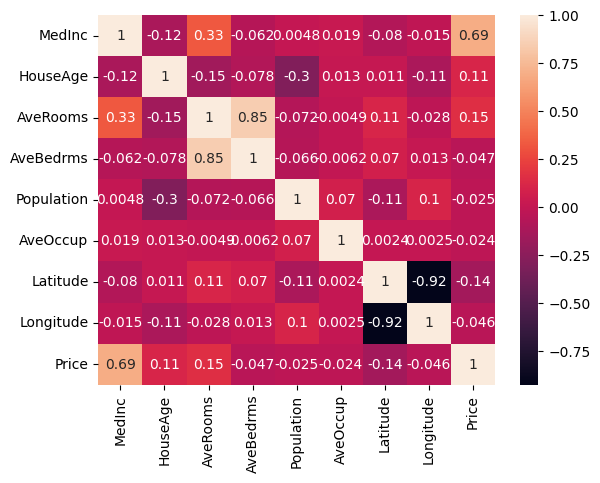

In [60]:
sns.heatmap(datasets.corr(),annot = True)

In [61]:
#independent and dependent features - divide

In [62]:
X = datasets.iloc[:,:-1]  #independent feature
y = datasets.iloc[:,-1] #dependent feature


In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 10)

In [64]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16750,2.4830,44.0,3.714286,1.040816,339.0,3.459184,37.71,-122.46
11962,2.7083,25.0,5.613293,1.105740,1311.0,3.960725,34.01,-117.40
758,3.8750,21.0,4.828215,1.120921,2461.0,2.361804,37.66,-122.07
17451,4.9292,17.0,6.802885,1.033654,1035.0,2.487981,34.71,-120.46
17018,6.8787,38.0,6.125203,0.980488,1455.0,2.365854,37.52,-122.29
...,...,...,...,...,...,...,...,...
9372,4.1250,37.0,5.109792,1.044510,648.0,1.922849,37.93,-122.53
7291,1.2059,18.0,2.537037,1.089744,1913.0,2.725071,33.98,-118.22
17728,5.5336,6.0,4.905336,0.965577,2160.0,3.717728,37.32,-121.79
7293,2.2059,35.0,2.748491,0.997988,2160.0,4.346076,33.98,-118.23


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]], shape=(13828, 8))

In [68]:
X_test_scaled

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]], shape=(6812, 8))

MODEL TRAINING

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
regression = LinearRegression

In [71]:
from sklearn.linear_model import LinearRegression

# initialize model (this must come after any similarly named variables)
regression = LinearRegression()

# then fit the model
regression.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
regression.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [73]:
regression.intercept_

np.float64(2.0634768086491158)

In [74]:
#prediction

y_pred_test = regression.predict(X_test_scaled)

In [75]:
y_pred_test

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012], shape=(6812,))

In [76]:
y_test

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: Price, Length: 6812, dtype: float64

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.552233239936362
0.5371056943007961
0.743123973463622


In [78]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

In [79]:
score

0.5935958526436639

Adjusted Rsquared

In [80]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5931179409607519

Picking -Pickle Library

In [81]:
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(scaler,open('regression.pkl','wb'))

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
import pandas as pd

df = pd.read_csv("forest.csv")  # Load normally
df = df[df['Temperature'] != 'Temperature']  # Remove duplicate header row
df = df.reset_index(drop=True)  # Reset index


In [181]:
df.columns = df.columns.str.strip()

In [182]:
numeric_cols = ['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.split().str[0]   # take first value from "14.6 9"
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float


In [183]:
df['Classes'] = df['Classes'].astype(str).str.strip()
df = df.dropna()  # Drop bad rows
df = df.reset_index(drop=True)


In [184]:
numeric_cols = ['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.split().str[0]   # take first value (e.g., "14.6 9" → "14.6")
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float


In [185]:
df = df.dropna().reset_index(drop=True)


In [186]:
print(df.dtypes)
print(df.head())


day            float64
month          float64
year           float64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object
   day  month    year  Temperature    RH    Ws  Rain  FFMC  DMC    DC  ISI  \
0  1.0    6.0  2012.0         29.0  57.0  18.0   0.0  65.7  3.4   7.6  1.3   
1  2.0    6.0  2012.0         29.0  61.0  13.0   1.3  64.4  4.1   7.6  1.0   
2  3.0    6.0  2012.0         26.0  82.0  22.0  13.1  47.1  2.5   7.1  0.3   
3  4.0    6.0  2012.0         25.0  89.0  13.0   2.5  28.6  1.3   6.9  0.0   
4  5.0    6.0  2012.0         27.0  77.0  16.0   0.0  64.8  3.0  14.2  1.2   

   BUI  FWI   Classes  
0  3.4  0.5  not fire  
1  3.9  0.4  not fire  
2  2.7  0.1  not fire  
3  1.7  0.0  not fire  
4  3.9  0.5  not fire  


In [187]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
240,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(13), object(1)
memory usage: 26.7+ KB


In [189]:
df.drop(columns=['day', 'month', 'year'], inplace=True)

In [227]:
df['Classes'] = df['Classes'].astype(str).str.strip()


In [228]:
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})


In [230]:
print(df['Classes'].unique())


[0 1]


In [231]:
#independent and dependent divide
X = df.drop(columns=['FWI'])
y = df['FWI']

In [232]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0


In [233]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [234]:
#Train and split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)

In [235]:
X_train.shape

(180, 10)

In [236]:
X_test.shape

(61, 10)

In [237]:
y_train.shape

(180,)

In [238]:
y_test.shape

(61,)

In [239]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.613005,-0.301235,-0.307011,0.651635,0.462097,0.368337,0.580591,0.440797,0.508035
RH,-0.613005,1.000000,0.259924,0.213885,-0.636747,-0.411800,-0.268681,-0.668010,-0.370469,-0.431363
Ws,-0.301235,0.259924,1.000000,0.115390,-0.170679,-0.024855,0.055862,-0.018615,0.007331,-0.107273
Rain,-0.307011,0.213885,0.115390,1.000000,-0.549114,-0.282358,-0.297097,-0.348153,-0.294785,-0.367581
FFMC,0.651635,-0.636747,-0.170679,-0.549114,1.000000,0.590971,0.515290,0.741859,0.585894,0.772729
DMC,0.462097,-0.411800,-0.024855,-0.282358,0.590971,1.000000,0.887550,0.697485,0.983188,0.566050
DC,0.368337,-0.268681,0.055862,-0.297097,0.515290,0.887550,1.000000,0.566223,0.945843,0.484170
ISI,0.580591,-0.668010,-0.018615,-0.348153,0.741859,0.697485,0.566223,1.000000,0.676302,0.742638
BUI,0.440797,-0.370469,0.007331,-0.294785,0.585894,0.983188,0.945843,0.676302,1.000000,0.565972
Classes,0.508035,-0.431363,-0.107273,-0.367581,0.772729,0.566050,0.484170,0.742638,0.565972,1.000000


In [240]:
def correlation(df,threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
             colname = corr_matrix.columns[i]
             col_corr.add(colname)

    return col_corr

In [241]:
corr_features = correlation(X_train,0.85)

In [242]:
corr_features

{'BUI', 'DC'}

In [243]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [244]:
X_train.shape

(180, 8)

In [245]:
X_test.shape

(61, 8)

FEATURE SCALING

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [247]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [248]:
X_train_scaled

array([[ 1.11201222, -1.01824764, -0.85656235, ...,  0.60168376,
         1.03372677,  0.90453403],
       [-0.82861852,  0.50336015, -0.51163792, ..., -0.40659276,
        -0.33884499,  0.90453403],
       [ 0.28031333, -0.6032637 , -0.85656235, ..., -0.36720696,
         0.45974222,  0.90453403],
       ...,
       [ 1.11201222, -2.0557075 , -0.85656235, ...,  0.88526153,
         1.10859433,  0.90453403],
       [ 0.83477926, -0.6032637 , -1.54641123, ..., -0.48536436,
        -0.36380084,  0.90453403],
       [-1.10585149,  1.12583607, -1.20148679, ..., -0.3987156 ,
        -0.81300614, -1.1055416 ]], shape=(180, 8))

In [249]:
X_test_scaled

array([[ 1.11201222e+00, -6.72427687e-01,  1.78210959e-01,
        -3.89176102e-01,  8.43509810e-01,  1.81476644e+00,
         1.45797623e+00,  9.04534034e-01],
       [ 1.11201222e+00, -1.19115762e-01,  8.68059834e-01,
        -2.41491566e-01,  1.95251881e-01, -2.25418070e-01,
        -4.38668390e-01,  9.04534034e-01],
       [ 1.11201222e+00, -1.22573961e+00, -5.11637916e-01,
        -3.89176102e-01,  9.76646654e-02, -7.68942130e-01,
        -6.38315192e-01, -1.10554160e+00],
       [ 2.22094408e+00, -1.98654351e+00, -5.11637916e-01,
        -3.89176102e-01,  1.10838939e+00, -2.96312513e-01,
         2.30647514e+00,  9.04534034e-01],
       [-2.21478334e+00,  1.33332804e+00, -1.66713478e-01,
        -1.92263387e-01, -2.26534005e+00, -1.07615138e+00,
        -1.08752050e+00, -1.10554160e+00],
       [-2.74152597e-01,  3.65032173e-01, -5.11637916e-01,
        -3.89176102e-01,  5.57718680e-01, -1.93909429e-01,
         1.05369146e-02,  9.04534034e-01],
       [ 1.38924518e+00, -1.848215

In [250]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
56,36.0,48.0,13.0,0.0,90.3,22.2,8.7,1
46,29.0,70.0,14.0,0.0,82.8,9.4,3.2,1
6,33.0,54.0,13.0,0.0,88.2,9.9,6.4,1
178,36.0,56.0,16.0,0.0,88.9,23.8,8.2,1
52,27.0,66.0,22.0,0.4,68.2,10.5,1.8,0
...,...,...,...,...,...,...,...,...
64,34.0,69.0,13.0,0.0,85.0,8.2,4.0,1
15,29.0,89.0,13.0,0.7,36.1,1.7,0.0,0
228,36.0,33.0,13.0,0.1,90.6,25.8,9.0,1
125,35.0,54.0,11.0,0.1,83.7,8.4,3.1,1


LINEAR REGRESSION MODEL

In [251]:
from sklearn.linear_model import LinearRegression

In [252]:
linreg = LinearRegression()

In [253]:
linreg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [254]:
y_pred = linreg.predict(X_test_scaled,)

In [255]:
y_pred

array([ 1.97021559e+01,  4.31480729e+00,  5.54647872e-01,  1.58404906e+01,
       -7.91534042e-01,  5.99998722e+00,  7.79060594e+00,  1.85325615e+00,
        2.05544550e+00,  1.12014302e+00,  3.69237515e-02, -2.21058682e-01,
        6.66683560e+00, -4.63139858e-01,  9.36743389e-01,  7.25027956e-01,
        1.07392350e+01,  2.94616085e+01,  1.78217073e+01,  1.06590831e+01,
        2.14537228e+01,  2.16401999e+01,  1.39740768e+01,  1.11012188e+01,
        6.73492151e+00,  1.22434580e+01, -5.80254480e-01,  5.55008695e-01,
        2.32607866e+01,  1.54152981e+00,  4.44582732e+00,  7.83613770e+00,
        1.08685642e+01, -2.74867304e-02,  8.45634785e-02,  1.79227301e+01,
        7.18911330e+00,  1.36803166e+01,  1.34446862e+01,  1.40274632e-01,
        9.46083079e+00,  1.12140691e+01,  2.86755401e+00,  1.58984182e+01,
        1.01235241e+01,  1.41317197e+01,  2.30502903e+00,  3.51303056e+00,
        2.66658614e+00,  1.57750291e+00, -6.66462380e-01,  1.79932281e+01,
        1.72789540e+01,  

In [256]:
from sklearn.metrics import mean_absolute_error

In [257]:
mae = mean_absolute_error(y_test,y_pred)

In [258]:
mae

0.680908678878861

In [259]:
from sklearn.metrics import r2_score

In [260]:
score = r2_score(y_test,y_pred)

In [261]:
score

0.9838263853593663

LASSO REGRESSION

In [262]:
from sklearn.linear_model import Lasso

In [263]:
lasso = Lasso()

In [264]:
lasso.fit(X_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [265]:
y_pred = lasso.predict(X_test_scaled)

In [266]:
y_pred

array([ 1.75778177e+01,  4.45323842e+00,  2.12321740e+00,  1.47257773e+01,
       -4.77502347e-01,  6.25856923e+00,  7.76713446e+00,  2.86546961e+00,
        3.05161727e+00,  2.87215252e+00,  1.90223149e-01,  7.22516830e-02,
        6.40327818e+00, -5.72748415e-01,  2.26491729e+00,  2.20543004e+00,
        1.00807806e+01,  2.57472572e+01,  1.60873010e+01,  1.01115243e+01,
        1.93079512e+01,  1.93958437e+01,  1.27988012e+01,  1.04082899e+01,
        6.93832514e+00,  1.14967706e+01, -2.50248366e-01,  2.04200778e+00,
        2.05571833e+01,  2.85043014e+00,  5.37729381e+00,  7.78350934e+00,
        1.04026100e+01,  7.57355082e-01,  6.06966246e-01,  1.60264725e+01,
        7.17961557e+00,  1.25381268e+01,  1.24783072e+01,  1.28338069e+00,
        9.06281455e+00,  1.05289380e+01,  3.79086042e+00,  1.39992410e+01,
        9.89630074e+00,  1.28536116e+01,  3.03557478e+00,  4.47596382e+00,
        3.39817813e+00,  3.10575702e+00,  8.61290101e-01,  1.64525752e+01,
        1.56070586e+01,  

In [267]:
y_test

83     22.3
76      4.2
61      0.9
181    13.5
106     0.0
       ... 
2       0.1
232    13.7
111     6.3
10      5.6
195    14.8
Name: FWI, Length: 61, dtype: float64

In [268]:
from sklearn.metrics import mean_absolute_error

In [269]:
mae = mean_absolute_error(y_test,y_pred)

In [270]:
mae

1.1625868139800732

In [271]:
from sklearn.metrics import r2_score

In [272]:
score = r2_score(y_test,y_pred)

In [273]:
score

0.9552655646197357

RIDGE REGRESSION

In [274]:
from sklearn.linear_model import Ridge

In [275]:
ridge = Ridge()

In [276]:
ridge.fit(X_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [277]:
y_pred = ridge.predict(X_test_scaled)

In [278]:
y_pred

array([ 1.96420429e+01,  4.40668441e+00,  6.20493145e-01,  1.57682702e+01,
       -8.49237289e-01,  6.02418913e+00,  7.87472685e+00,  1.88772566e+00,
        2.09914085e+00,  1.14217567e+00,  2.49661986e-02, -2.62439114e-01,
        6.76363738e+00, -5.30860648e-01,  9.84870008e-01,  7.55660098e-01,
        1.07340013e+01,  2.92948473e+01,  1.78015417e+01,  1.07069353e+01,
        2.13340405e+01,  2.15079723e+01,  1.39562169e+01,  1.10964645e+01,
        6.75366590e+00,  1.22359264e+01, -6.32865444e-01,  5.85799081e-01,
        2.31946712e+01,  1.60282046e+00,  4.46893820e+00,  7.85134867e+00,
        1.08682914e+01, -4.81768942e-02,  9.03880161e-02,  1.78534934e+01,
        7.20815691e+00,  1.36571862e+01,  1.34409796e+01,  1.53982969e-01,
        9.47764096e+00,  1.12068716e+01,  2.90630715e+00,  1.59131184e+01,
        1.01287175e+01,  1.41288229e+01,  2.34448180e+00,  3.48894403e+00,
        2.72217473e+00,  1.60025540e+00, -6.98775556e-01,  1.79369263e+01,
        1.72479881e+01,  

In [279]:
from sklearn.metrics import mean_absolute_error

In [280]:
mae = mean_absolute_error(y_test,y_pred)

In [281]:
mae

0.695957450803563

In [282]:
from sklearn.metrics import r2_score

In [283]:
score = r2_score(y_test,y_pred)

In [284]:
score

0.9835825518149678

ELASTIC NET REGRESSION

In [285]:
from sklearn.linear_model import ElasticNet

In [286]:
elastic = ElasticNet()

In [287]:
elastic.fit(X_train_scaled,y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [288]:
y_pred = elastic.predict(X_test_scaled)

In [289]:
y_pred

array([ 1.58926727e+01,  6.17335385e+00,  3.19810423e+00,  1.35840597e+01,
       -7.16158028e-01,  7.06616778e+00,  9.28880314e+00,  3.30887937e+00,
        3.53191977e+00,  3.38126606e+00, -2.10742833e-02, -1.01817836e-01,
        7.95177304e+00, -8.40659070e-01,  2.95895383e+00,  2.75053377e+00,
        9.92399232e+00,  2.17147863e+01,  1.51723061e+01,  1.07110816e+01,
        1.68933326e+01,  1.67578246e+01,  1.21084422e+01,  1.00588413e+01,
        7.62605877e+00,  1.13015372e+01, -3.92110628e-01,  2.66612441e+00,
        1.84092619e+01,  3.54509110e+00,  5.48000742e+00,  8.23246678e+00,
        1.04758211e+01,  7.80290671e-01,  6.60563507e-01,  1.41331489e+01,
        7.74765700e+00,  1.18191978e+01,  1.21603137e+01,  1.57542491e+00,
        9.34040771e+00,  1.03279468e+01,  3.97647529e+00,  1.31971930e+01,
        1.02157525e+01,  1.23518569e+01,  4.42468770e+00,  3.72188658e+00,
        4.96618750e+00,  3.72007807e+00,  8.31268003e-01,  1.52077057e+01,
        1.45288566e+01,  

In [290]:
from sklearn.metrics import mean_absolute_error

In [291]:
mae = mean_absolute_error(y_test,y_pred)

In [292]:
mae

1.7995661330786639

In [293]:
from sklearn.metrics import r2_score

In [294]:
score = r2_score(y_test,y_pred)

In [295]:
score

0.8954327179402658

In [9]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

LOGISTIC REGRESSION IMPLEMENTATION

In [1]:
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()

In [3]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = dataset.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df['target'].unique()

array([0, 1, 2])

In [19]:
df.shape

(150, 5)

In [20]:
#binary classification

df_copy = df[df['target'] != 2]

In [21]:
df_copy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [23]:
df_copy.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


In [24]:
#independent and dependent divide


In [25]:
X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]

In [26]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state = 42)

In [30]:
X_train.shape

(80, 4)

In [31]:
X_test.shape

(20, 4)

In [32]:
y_train.shape

(80,)

In [33]:
y_test.shape

(20,)

MODEL TRANING

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
classifier = LogisticRegression()

In [36]:
classifier.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
y_pred = classifier.predict(X_test)

In [38]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

Confusion matrix,Accuracy Score,classification report

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [40]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[12  0]
 [ 0  8]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



HYPERPARAMETER TUNING

In [41]:

#Grid search cv
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [42]:
parameters = {'penalty':('l1','l2','elasticnet',None), 'C':[1,10,20]}

In [43]:
clf = GridSearchCV(classifier,param_grid=parameters, cv = 5)

In [44]:
clf.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 10, ...], 'penalty': ('l1', ...)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [45]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [46]:
y_pred = classifier.predict(X_test) 

In [47]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[12  0]
 [ 0  8]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [48]:
#Randomized search

from sklearn.model_selection import RandomizedSearchCV

In [49]:
parameters = {'penalty':('l1','l2','elasticnet',None), 'C':[1,10,20]}

In [50]:
random_clf = RandomizedSearchCV(LogisticRegression(),param_distributions = parameters)

In [51]:
random_clf.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_distributions,"{'C': [1, 10, ...], 'penalty': ('l1', ...)}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [52]:
random_clf.best_params_

{'penalty': None, 'C': 10}

In [53]:
y_pred = classifier.predict(X_test) 

In [54]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

LOGISTIC REGRESSION FOR MULTICLASS CLASSIFICATION

In [55]:
from sklearn.datasets import make_classification

In [56]:
X,y = make_classification(n_samples =1000, n_features=10 , n_informative=5 , n_redundant=5 , n_classes = 3 , random_state = 1)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
#model = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs')

In [59]:
model = LogisticRegression(multi_class = 'ovr',solver = 'lbfgs')

In [60]:
#Train and Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =  0.20 ,random_state = 42  )

In [61]:
#training model
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred

array([1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1,
       2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0])

In [64]:
y_test

array([1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1,
       2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1,
       0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2,
       2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0,
       1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2,
       1, 2])

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [66]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))


[[56 10 17]
 [16 41  6]
 [ 3 13 38]]
0.675
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        83
           1       0.64      0.65      0.65        63
           2       0.62      0.70      0.66        54

    accuracy                           0.68       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.68      0.68      0.68       200



DECISION TREE

DECISION TREE CLASSIFIER IMPLEMENTATION WITH POST PRUNNING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris

In [22]:
dataset = load_iris()

In [23]:
print(dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [24]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
from sklearn.datasets import load_iris
import pandas as pd

dataset = load_iris()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target


In [31]:
df['target'].unique()

array([0, 1, 2])

In [32]:
X = df.iloc[:,:-1]
y = dataset.target

In [33]:
X,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0,

In [34]:
#train and split
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 23)

In [36]:
X_train.shape

(100, 4)

In [37]:
X_test.shape

(50, 4)

In [38]:
y_train.shape

(100,)

In [39]:
y_test.shape

(50,)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
#post prunning ,construct tree
treeclassifier = DecisionTreeClassifier()

In [42]:
treeclassifier.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[2] <= 4.85\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 1.7\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.7, 0.4166666666666667, 'x[2] <= 5.35\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.6, 0.25, 'x[1] <= 2.35\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(

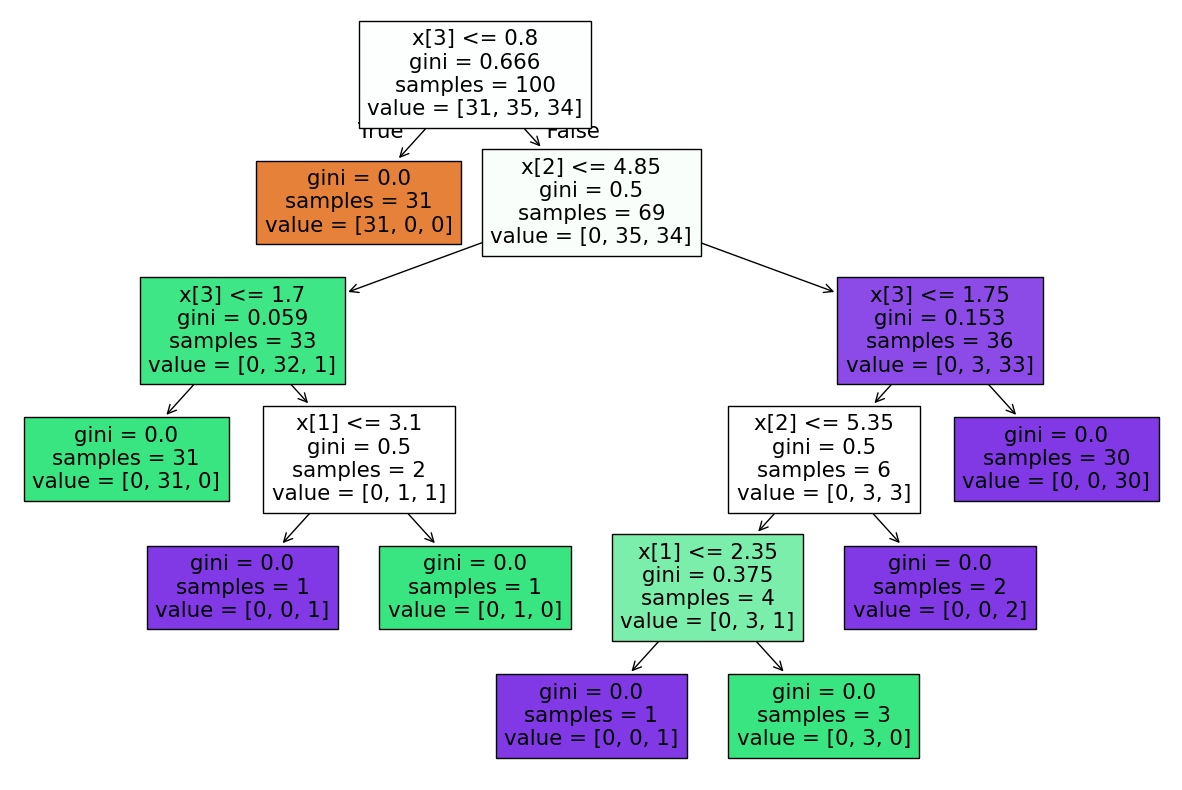

In [43]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [44]:
#post prunning
treeclassifier = DecisionTreeClassifier(max_depth =2)
treeclassifier.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.85\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 3, 33]')]

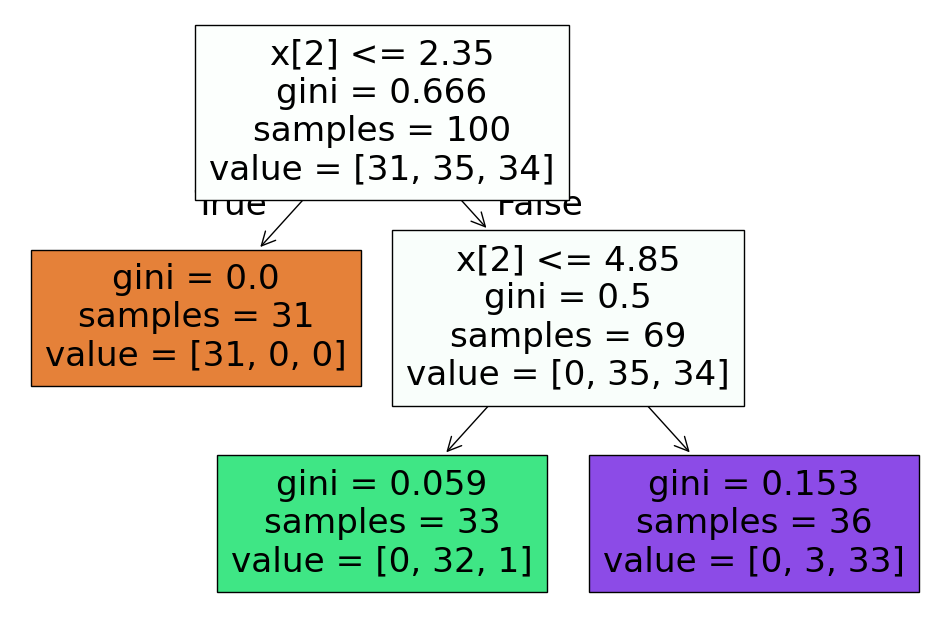

In [45]:
plt.figure(figsize=(12,8))
tree.plot_tree(treeclassifier,filled=True)

In [46]:
#predicition
y_pred = treeclassifier.predict(X_test)

In [47]:
y_pred

array([2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 1, 2, 0, 1])

In [48]:
y_test

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 2, 2, 0, 1])

In [49]:
from sklearn.metrics import accuracy_score,classification_report

In [50]:
score = accuracy_score(y_pred,y_test)

In [51]:
score

0.94

In [52]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



DECISION TREE CLASSIFIER WITH PREPRUNNING

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
parameter = {'criterion' : ['gini','entropy','log_loss'],
             'splitter' : ['best','random'],
             'max_depth' : [1,2,3,4,5],
             'max_features':['auto','sqrt','log2']
             
}

In [65]:
from sklearn.model_selection import GridSearchCV

In [68]:
treeclassifier = DecisionTreeClassifier()
clf = GridSearchCV(treeclassifier,param_grid = parameter, cv =5, scoring = 'accuracy')

In [69]:
clf.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [70]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [71]:
y_pred = clf.predict(X_test)

In [72]:
y_pred

array([2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 1, 2, 0, 1])

In [73]:
y_test

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 2, 2, 0, 1])

In [74]:
score = accuracy_score(y_pred,y_test)

In [75]:
score

0.96

In [76]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



DECISION TREE REGRESSOR

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [28]:
#california housing dataset
from sklearn.datasets import fetch_california_housing

In [52]:
california= fetch_california_housing()

In [53]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [54]:

# Create DataFrame from features
df_california = pd.DataFrame(california.data, columns=california.feature_names)

# Add target column (from dataset object, not DataFrame)
df_california["Target"] = california.target

In [55]:
df_california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [57]:
df = df_california

In [59]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
#independent and dependent 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [64]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [65]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [69]:
X_train.shape

(13828, 8)

In [70]:
X_test.shape

(6812, 8)

In [71]:
y_train.shape

(13828,)

In [72]:
y_test.shape

(6812,)

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
regressor = DecisionTreeRegressor()

In [76]:
regressor.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [77]:
y_pred = regressor.predict(X_test)

In [78]:
y_pred

array([0.565  , 0.521  , 5.00001, ..., 1.33   , 1.387  , 4.577  ],
      shape=(6812,))

In [79]:
from sklearn.metrics import r2_score

In [81]:
score = r2_score(y_pred,y_test)

In [82]:
score

0.5913051581721112

In [110]:
#hypertuning
parameter = {
    "criterion" : ["squared_error","fried_mse","absolute_error"],
    "splitter" : ["best","random"],
    "max_depth" : [1,2,3,4,5,6,7,8,910,11,12],
    "max_features" : ["auto","sqrt","log2"]
}

In [111]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
regressorcv = GridSearchCV(regressor,param_grid = parameter, cv = 2, scoring = 'neg_mean_squared_error')

In [114]:
regressorcv.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'fried_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [109]:
regressorcv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [115]:
y_pred = regressorcv.predict(X_test)

In [116]:
y_pred

array([0.61046967, 0.61046967, 4.64074377, ..., 1.35175806, 1.45382785,
       2.96056652], shape=(6812,))

In [117]:
r2_score(y_pred,y_test)

0.5985274493674038

SUPPORT VECTOR CLASSIFIER IMPLEMENTATION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [8]:
X,y = make_classification(n_samples = 1000, n_features = 2,n_classes = 2, n_clusters_per_class = 2, n_redundant = 0)

In [9]:
X

array([[ 1.33215175, -0.87311281],
       [-0.68094668, -0.29130122],
       [-1.1291687 , -1.34841395],
       ...,
       [-0.3459248 ,  0.20030228],
       [-1.15577446,  0.87355737],
       [-1.03711395,  0.4597358 ]], shape=(1000, 2))

In [10]:

y

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,

In [11]:
pd.DataFrame(X)

,0,1
0,1.332152,-0.873113
1,-0.680947,-0.291301
2,-1.129169,-1.348414
3,-0.968667,0.965423
4,0.746083,-0.892766
...,...,...
995,-2.211705,-0.659294
996,2.118060,2.178262
997,-0.345925,0.200302
998,-1.155774,0.873557


<Axes: xlabel='0', ylabel='1'>

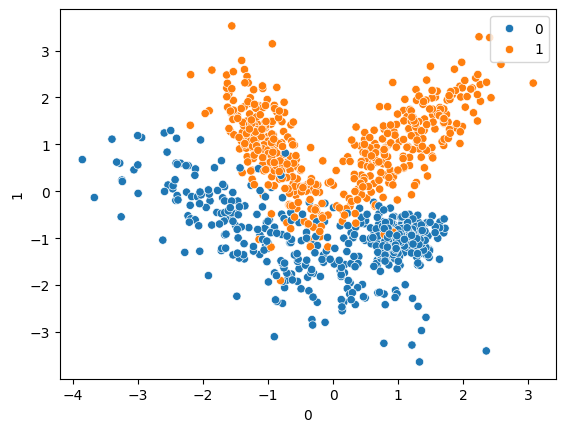

In [13]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
X_train.shape

(750, 2)

In [20]:
X_test.shape

(250, 2)

In [21]:
y_train.shape

(750,)

In [22]:
y_test.shape

(250,)

In [23]:
from sklearn.svm import SVC

In [25]:
svc = SVC(kernel= 'linear')

In [27]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [28]:
svc.coef_

array([[0.57459567, 2.40283444]])

In [29]:
#prediction
y_pred = svc.predict(X_test)

In [30]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.94      0.86      0.90       125
           1       0.87      0.94      0.91       125

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250

[[108  17]
 [  7 118]]
0.904


HYPERPARAMETER TUNING WITH SVC

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {
    'C' : [0,1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']
}

In [39]:
grid = GridSearchCV(SVC(),param_grid,refit= True, cv =5 , verbose = 3)

In [40]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END ......C=0, gamma=0.01, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END ......C=0, gamma=0.01, kernel=line

C:\Users\Ahmed Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ahmed Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ahmed Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\Ahmed Ali\AppData\Local\Programs\Python\Python310\lib\site-package

,estimator,SVC()
,param_grid,"{'C': [0, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [41]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [42]:
y_pred = grid.predict(X_test)

In [43]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [45]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.94      0.87      0.90       124
           1       0.88      0.94      0.91       126

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[108  16]
 [  7 119]]
0.908


Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression 

In [4]:
X,y = make_regression(n_samples = 1000, n_features = 2, n_targets =1, noise= 3.0)

In [5]:
X

array([[ 0.09125327, -0.74862562],
       [ 1.31395986,  1.9007439 ],
       [-0.11822855,  0.26646445],
       ...,
       [ 1.0618658 , -0.01535951],
       [ 1.08422008,  0.41277781],
       [-0.70171291,  1.61013693]], shape=(1000, 2))

In [6]:
y

array([-4.79393980e+01,  2.28670222e+02,  8.26487304e+00, -1.07499788e+02,
        6.92774153e+00, -4.02966777e+01, -6.68545433e+01,  1.60527664e+02,
        4.27403927e+01,  7.59885145e+01, -6.82503599e+00,  8.43756861e+01,
       -1.15331818e+02, -3.38542247e+01,  1.80404564e+02, -8.09557441e+01,
        1.51972248e+02,  1.73536240e+01,  2.97043715e+01,  2.53867029e+01,
        1.84358621e+01, -1.09922506e+02,  2.32553478e+01,  4.99242351e+01,
       -2.48700161e+01,  1.11700003e+02,  3.14493099e+00, -1.84876991e+02,
        3.44859378e+01,  5.41756532e+01, -6.62006611e+01,  1.60868720e+02,
        4.66383603e+01,  9.87042564e+01, -4.57779240e+00,  2.08461836e+02,
        1.39061590e+02, -1.63684971e+02, -3.33197996e+01, -9.43184891e+01,
       -5.41163407e+01,  1.20200134e+02, -2.17984292e+02,  3.59325829e+00,
       -9.46717467e+01,  2.32229642e+01, -6.48612275e+01, -6.43043077e+01,
       -7.55243919e+01,  8.15676512e+01, -6.30728651e+01, -8.78815633e+01,
       -6.44318005e+01,  

<Axes: xlabel='0', ylabel='1'>

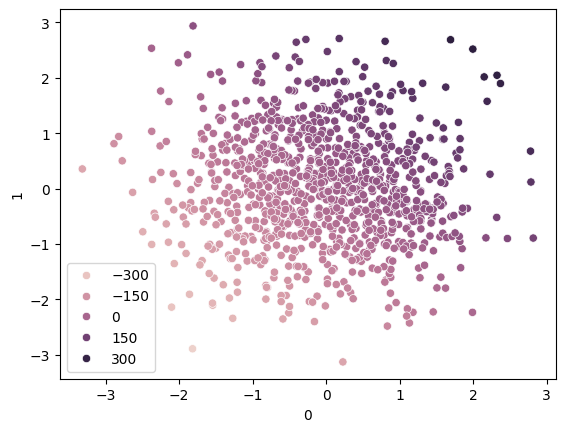

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25,random_state=42)

In [11]:
X_train.shape

(750, 2)

In [12]:
X_test.shape

(250, 2)

In [14]:
y_train.shape

(750,)

In [15]:
y_test.shape

(250,)

In [17]:
from sklearn.svm import SVR

In [20]:
svr = SVR(kernel='linear')

In [21]:
svr.fit(X_train,y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [22]:
svr.coef_

array([[71.57985056, 71.36693268]])

In [24]:
y_pred = svr.predict(X_test)

In [25]:
y_pred

array([ 4.15170036e+01, -1.55336847e+01, -4.81111701e+01, -1.12270125e+02,
        3.39429549e+01, -1.68371367e+02,  2.56182571e+01,  3.87868064e+01,
       -5.67617313e+01,  1.22357403e+02,  2.31786303e+01, -5.06035858e+01,
        1.73597760e+02,  1.09658872e+02,  1.21926375e+02,  4.28750714e+01,
        7.54854808e+01, -1.18178091e+01,  3.37875969e+01,  1.31629269e+02,
        3.05156276e+02, -3.86687751e+01, -9.26591269e+00,  7.74410700e+01,
        3.95441617e+01,  6.28444245e+01,  2.89294138e+01, -2.96271732e+01,
        2.15665231e+01,  5.85809748e+01, -2.63886493e+00,  1.22209801e+02,
        2.07898281e+02, -5.07899215e+01, -5.74356710e+01,  5.88571628e+01,
        5.62441219e+01,  1.66379710e+02,  1.11806613e+01,  1.12626328e+02,
        2.47258995e+02, -4.95252767e+01, -2.29585125e+01, -6.51154830e+01,
       -1.90546716e+01,  1.54022566e+02,  4.53036394e+01, -6.78342505e+01,
        3.99951375e+01, -3.23965180e+01, -1.05718784e+02, -1.75641352e+02,
        1.42542963e+02,  

In [26]:
y_test

array([  35.84488985,  -18.24011245,  -47.32255958, -119.13679565,
         34.98982857, -169.83694037,   21.91087772,   39.88327198,
        -54.19388685,  122.64996197,   22.63956166,  -55.07547297,
        170.14045891,  108.37137812,  126.75590035,   40.40941935,
         76.77078665,  -11.21673106,   35.7478169 ,  132.25853117,
        299.55938983,  -40.17689852,   -6.79867371,   77.88045652,
         37.17637557,   61.93325063,   30.40174244,  -27.89864448,
         21.63168232,   56.73189589,   -1.03211471,  120.87842191,
        207.50627835,  -49.3676313 ,  -56.06140674,   56.95396841,
         57.72155887,  168.32255641,    8.05783969,  112.71916864,
        247.5638679 ,  -48.88323884,  -18.77776785,  -62.96943583,
        -21.23304177,  154.76874671,   41.61336558,  -63.81173475,
         43.01789357,  -31.59999437, -105.25036858, -175.99538311,
        136.64113717,   71.21985863,   49.92423515,  -66.20066113,
         59.61172261,   -6.82503599,  -24.86871885,   59.62410

In [27]:
from sklearn.metrics import r2_score

In [28]:
print(r2_score(y_pred,y_test))

0.999088738201753


In [30]:
#hyperparameter tuning with svr
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'C':[0.1,110,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0,0.1,0.2,0.3]}

In [34]:
grid =GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [35]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END C=0.1, epsilon=0, gamma=1, kernel=linear;, score=0.689 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0, gamma=1, kernel=linear;, score=0.697 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0, gamma=1, kernel=linear;, score=0.697 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0, gamma=1, kernel=linear;, score=0.701 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0, gamma=1, kernel=linear;, score=0.676 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0, gamma=0.1, kernel=linear;, score=0.689 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0, gamma=0.1, kernel=linear;, score=0.697 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0, gamma=0.1, kernel=linear;, score=0.697 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0, gamma=0.1, kernel=linear;, score=0.701 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0, gamma=0.1, kernel=linear;, score=0.676 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0, gamma=0.01, kernel=linear;,

,estimator,SVR()
,param_grid,"{'C': [0.1, 110, ...], 'epsilon': [0, 0.1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [36]:
y_pred = grid.predict(X_test)

In [37]:
y_pred

array([ 4.17264793e+01, -1.55891177e+01, -4.83938634e+01, -1.12790929e+02,
        3.40693852e+01, -1.69201799e+02,  2.57589556e+01,  3.89449664e+01,
       -5.70737937e+01,  1.22910342e+02,  2.32943724e+01, -5.08428952e+01,
        1.74450550e+02,  1.10169396e+02,  1.22569878e+02,  4.30356696e+01,
        7.58329359e+01, -1.19145472e+01,  3.39796323e+01,  1.32277896e+02,
        3.06620434e+02, -3.88427121e+01, -9.31179888e+00,  7.77690217e+01,
        3.97340357e+01,  6.31065212e+01,  2.90216321e+01, -2.98165918e+01,
        2.16671156e+01,  5.88428797e+01, -2.64443155e+00,  1.22792673e+02,
        2.08844654e+02, -5.10070971e+01, -5.77519962e+01,  5.91094612e+01,
        5.65085891e+01,  1.67201605e+02,  1.11990198e+01,  1.13137549e+02,
        2.48454903e+02, -4.97809751e+01, -2.30915139e+01, -6.54688756e+01,
       -1.91706821e+01,  1.54756454e+02,  4.55120886e+01, -6.81778146e+01,
        4.01319504e+01, -3.25379414e+01, -1.06214567e+02, -1.76474807e+02,
        1.43251530e+02,  

In [38]:
y_test

array([  35.84488985,  -18.24011245,  -47.32255958, -119.13679565,
         34.98982857, -169.83694037,   21.91087772,   39.88327198,
        -54.19388685,  122.64996197,   22.63956166,  -55.07547297,
        170.14045891,  108.37137812,  126.75590035,   40.40941935,
         76.77078665,  -11.21673106,   35.7478169 ,  132.25853117,
        299.55938983,  -40.17689852,   -6.79867371,   77.88045652,
         37.17637557,   61.93325063,   30.40174244,  -27.89864448,
         21.63168232,   56.73189589,   -1.03211471,  120.87842191,
        207.50627835,  -49.3676313 ,  -56.06140674,   56.95396841,
         57.72155887,  168.32255641,    8.05783969,  112.71916864,
        247.5638679 ,  -48.88323884,  -18.77776785,  -62.96943583,
        -21.23304177,  154.76874671,   41.61336558,  -63.81173475,
         43.01789357,  -31.59999437, -105.25036858, -175.99538311,
        136.64113717,   71.21985863,   49.92423515,  -66.20066113,
         59.61172261,   -6.82503599,  -24.86871885,   59.62410

In [39]:
print(r2_score(y_pred,y_test))

0.9990721615465555


In [40]:
grid.best_params_

{'C': 110, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
9

SVM KERNEL IMPLEMENTATION

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
x = np.hstack([x,-x])
y = np.hstack([y,-y])

In [21]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
x1 = np.hstack([x1,-x1])
y1 = np.hstack([y1,-y1])

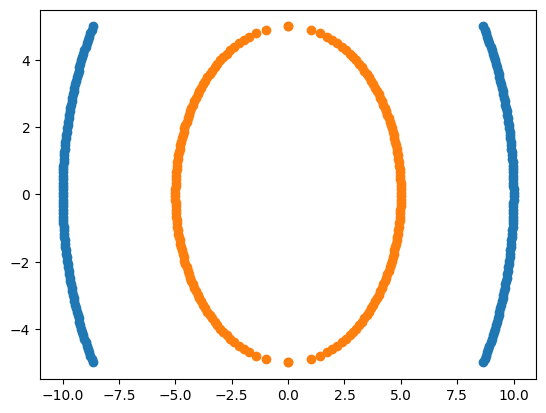

In [22]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [26]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0

df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=0



In [31]:
df = pd.concat([df1, df2], ignore_index=True)

In [32]:
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
395,-1.969049,-4.59596,0
396,-1.714198,-4.69697,0
397,-1.406908,-4.79798,0
398,-0.999949,-4.89899,0


POLYNOMIAL KERNEL

BASED ON THE FORMULA

In [33]:
df['X1_square']=df['X1']**2
df['X2_square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [36]:
X = df[['X1_square','X2_square','X1','X2']]
y = df['Y']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [38]:
X_train.head(3)

,X1_square,X2_square,X1,X2
250,24.997449,0.002551,4.999745,0.050505
63,98.140496,1.859504,9.906589,1.363636
312,10.651974,14.348026,-3.263736,3.787879


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

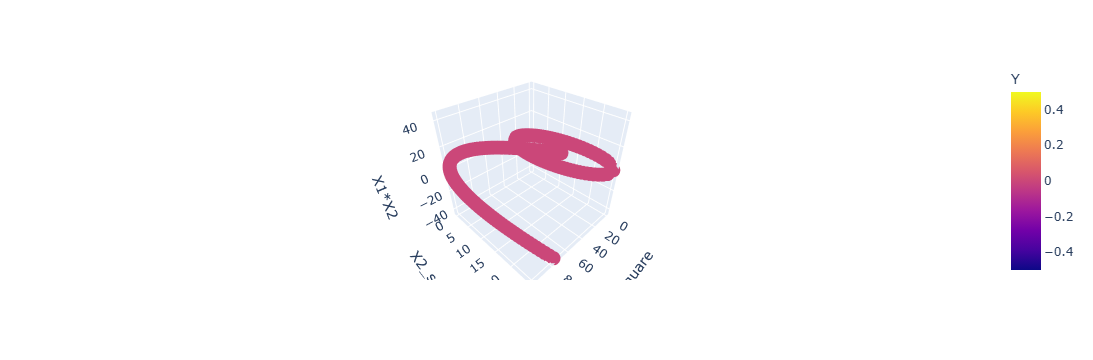

In [40]:
import plotly.express as px
import plotly.express as px
fig = px.scatter_3d(df,x='X1_square',y='X2_square',z='X1*X2',color='Y')
fig.show()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

NIAVE BAYES CLASSIFICATION

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X,y = load_iris(return_X_y = True)

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
from sklearn.model_selection import train_test_split 

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.30,random_state=42)

In [57]:
X_train.shape

(105, 4)

In [58]:
X_test.shape

(45, 4)

In [59]:
y_train.shape

(105,)

In [60]:
y_test.shape

(45,)

In [62]:
from sklearn.naive_bayes import GaussianNB

In [64]:
gnb = GaussianNB()

In [65]:
gnb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [66]:
#predict
y_pred = gnb.predict(X_test)

In [67]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [68]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [71]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]


ENSEMBLE TECHNIQUE - Combine of Multiple Model

RANDOM FOREST CLASSIFIER with pipeline and hypermeter tuning

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [128]:
df =sns.load_dataset('tips')

In [129]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [130]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [131]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [132]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [133]:
from sklearn.preprocessing import LabelEncoder

In [134]:
encoder = LabelEncoder()

In [135]:
df['time'] = encoder.fit_transform(df['time'])

In [136]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4


In [137]:
df['time'].unique()

array([0, 1])

In [138]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4


In [139]:
X = df.drop(labels = ['time'], axis = 1 )

In [140]:
X.head()
y = df['time']

In [141]:
y = df['time']

In [142]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: time, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [145]:
X_train.shape

(195, 6)

In [146]:
X_test.shape

(49, 6)

In [147]:
y_train.shape

(195,)

In [148]:
y_train.shape

(195,)

FEATuRE ENGEENERING AUTOMATION

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #handling missing values
from sklearn.preprocessing import StandardScaler #feature scaling
from sklearn.preprocessing import OneHotEncoder #categorical to numerical
from sklearn.compose import ColumnTransformer #


In [150]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
179,34.63,3.55,Male,Yes,Sun,0,2
99,12.46,1.50,Male,No,Fri,0,2
129,22.82,2.18,Male,No,Thur,1,3
231,15.69,3.00,Male,Yes,Sat,0,3
123,15.95,2.00,Male,No,Thur,1,2


In [151]:
categorical_cols = ['sex','smoker','day']
numerical_cols = ['total_bill','tip','size']

In [152]:
num_pipeline = Pipeline(steps = [('imputer',SimpleImputer(strategy = 'median')),
                                 ('scaler',StandardScaler())])

In [153]:
cat_pipeline = Pipeline(steps = [('imputer',SimpleImputer(strategy = 'most_frequent')),
                                 ('OneHotEncoder', OneHotEncoder())
                                ])

In [154]:
preprocessor = ColumnTransformer([('num_pipeline',num_pipeline,numerical_cols),
                                 ('cat_pipeline',cat_pipeline,categorical_cols)])

In [155]:
preprocessor

,transformers,"[('num_pipeline', ...), ('cat_pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [156]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

MODEL BUILDING USING RANDOM FOREST

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rfc = RandomForestClassifier()

In [159]:
rfc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [160]:
y_pred = rfc.predict(X_test)

In [161]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1])

In [162]:
y_test

24     0
6      0
153    0
211    0
198    1
176    0
192    1
124    1
9      0
101    0
45     0
233    0
117    1
177    0
82     1
146    1
200    1
15     0
66     0
142    1
33     0
19     0
109    0
30     0
186    0
120    1
10     0
73     0
159    0
156    0
112    0
218    0
25     0
60     0
18     0
119    1
97     0
197    1
139    1
241    0
75     0
127    1
113    0
16     0
196    1
67     0
168    0
38     0
195    1
Name: time, dtype: int64

In [163]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [164]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9591836734693877
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.88      0.94        17

    accuracy                           0.96        49
   macro avg       0.97      0.94      0.95        49
weighted avg       0.96      0.96      0.96        49

[[32  0]
 [ 2 15]]


HYPERMETER TUNING

In [165]:
classifier = RandomForestClassifier()

In [166]:
params = {
    'max_depth' : [3,5,10,None],
    'n_estimators' : [100,200,300],
    'criterion' : ['gini','entropy']
}

In [167]:
from sklearn.model_selection import RandomizedSearchCV

In [168]:
cv =RandomizedSearchCV(classifier , param_distributions = params, scoring = 'accuracy',cv = 5, verbose =3)

In [169]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.974 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.949 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.974 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.923 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.923 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.974 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.923 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=1.000 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.897 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=300;, score

,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [170]:
cv.best_params_

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}

MODEL TRAINING AUTOMATION

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [172]:
models = {
    'Random Forest' : RandomForestClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier()
}

In [173]:
from sklearn.metrics import accuracy_score

In [174]:
print(accuracy_score(y_pred,y_test))

0.9591836734693877


In [175]:
def evaluate_model(X_train,y_train,X_test,y_test,models):

    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        
        #Train Model
        model.fit(X_train,y_train)

        #Predicting Testing Data
        y_pred = model.predict(X_test)

        #get accuracy for test data prediction

        test_model_score = accuracy_score(y_test,y_pred)

        report[list(models.keys())[i]] = test_model_score

    return report

In [176]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.9591836734693877,
 'Logistic Regression': 1.0,
 'Decision Tree': 0.9387755102040817}

BOOSTING ALGORITHM - ADA BOOST, XG BOOST, GRADIENT BOOST

CLASSIFICATION

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np

In [65]:
from sklearn.datasets import make_classification

In [66]:
X,y = make_classification(n_samples = 1000, n_features = 4, n_informative = 2, n_redundant =0,random_state = 0, shuffle = False)

In [67]:
X.shape

(1000, 4)

In [68]:
y.shape

(1000,)

In [69]:
from sklearn.model_selection import train_test_split 

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

In [71]:
X_train.shape

(670, 4)

In [72]:
X_test.shape

(330, 4)

In [73]:
y_train.shape

(670,)

In [74]:
y_test.shape

(330,)

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Model Building Using AdaBoost Classifier

In [77]:
classifier1 =AdaBoostClassifier()

In [78]:
classifier1.fit(X_train,y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [79]:
y_pred1 = classifier1.predict(X_test)

In [80]:
y_pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [81]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [82]:
print(accuracy_score(y_pred1,y_test))
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       164
           1       0.94      0.93      0.93       166

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330

[[154  10]
 [ 12 154]]


Model Building Using GradientBoostingClassifier 

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
classifier2 = GradientBoostingClassifier()

In [85]:
classifier2.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [86]:
y_pred2 = classifier2.predict(X_test)

In [87]:
y_pred2

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [88]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [89]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [90]:
print(accuracy_score(y_pred1,y_test))
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       164
           1       0.94      0.93      0.93       166

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330

[[154  10]
 [ 12 154]]


Model Building Using xgBoost 

In [91]:
import xgboost as xb

In [92]:
classifier3 =xb.XGBClassifier()

In [93]:
classifier3.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [94]:
y_pred3 = classifier3.predict(X_test)

In [95]:
y_pred3

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [96]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [97]:
print(accuracy_score(y_pred1,y_test))
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       164
           1       0.94      0.93      0.93       166

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330

[[154  10]
 [ 12 154]]


REGRESSION

In [98]:
from sklearn.datasets import make_regression

In [99]:
X,y = make_regression(n_samples = 1000, n_features = 4, n_informative = 2,random_state = 0, shuffle = False)

In [100]:
X

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       ...,
       [ 0.10672049, -0.9118813 , -1.46836696,  0.5764787 ],
       [ 0.06530561, -0.7735128 ,  0.39494819, -0.50388989],
       [ 1.77955908, -0.03057244,  1.57708821, -0.8128021 ]],
      shape=(1000, 4))

In [101]:
y

array([ 1.43235030e+02,  7.29897370e+01,  1.59851546e+01,  5.89327679e+01,
        9.07688808e+01, -1.38086141e+02,  7.37402139e+01,  1.87428448e+02,
       -1.71984211e+02,  1.51731020e+02, -1.51507550e+02, -5.94857214e+01,
       -1.22433348e+02, -1.01253057e+02,  2.15351271e+01, -6.62235049e+01,
       -1.04097846e+01, -5.91986499e+01,  8.67988366e+00, -9.21135814e+01,
       -2.91939718e+01,  2.08326173e+02, -1.41066327e+01,  6.90889025e+01,
        1.00980511e+02,  5.32578221e+01,  2.88043311e+01,  2.14765872e+02,
        4.82733955e+01,  5.61477118e+01, -3.59515100e+01, -5.59518384e+01,
        6.89018321e+01, -4.43787629e+01,  2.77800053e+01, -7.74254734e+01,
        2.16178122e+02, -1.16003018e+02, -9.73845834e+01,  1.65020074e+01,
        7.42310403e+01, -3.64911689e+01,  9.91278971e+01,  2.21102218e+01,
       -9.37150212e+01, -1.01426926e+02, -4.71378707e+01,  3.59957958e+01,
       -6.82680203e+01,  9.90707471e+01, -3.87138537e+01, -4.69542098e+01,
        1.36537180e+01,  

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

In [104]:
X_train.shape

(670, 4)

In [105]:
y_test.shape

(330,)

MODEL BUILDING - adaboost regressor

In [106]:
from sklearn.ensemble import AdaBoostRegressor

In [107]:
regressor1 =AdaBoostRegressor()

In [108]:
regressor1.fit(X_train,y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,None


In [109]:
y_preda = regressor1.predict(X_test)

In [110]:
y_preda

array([-1.83663626e+01, -7.55757454e+01, -3.89434170e+01,  9.07349687e+01,
        9.76572536e+01,  6.69189248e+01, -5.49537410e+01, -2.06037222e+01,
        3.32793420e+00, -6.26651951e+01, -4.45873950e+00,  8.01529559e+00,
        1.03846330e+02,  2.17746679e+01, -7.81883545e+01, -4.41182752e+01,
        9.65890911e+01, -1.03528176e+02,  6.96603322e+01, -1.23245357e+02,
        2.32829750e+01, -6.95561893e+01,  2.98901898e+01, -8.94610638e+01,
        4.76187490e+00,  9.15344660e+01, -8.03090348e+01, -8.94610638e+01,
       -2.45449962e+01, -4.08697395e+01,  9.25119351e+01, -1.34023939e+02,
       -1.03794252e+02,  6.96603322e+01,  8.01529559e+00, -3.91563265e+00,
       -1.32934959e+02, -1.45500724e+02, -5.46062475e+01,  4.84553192e+01,
       -3.98742103e+01, -4.21756393e+01, -1.01391403e+02, -1.03528176e+02,
       -1.83663626e+01,  9.76572536e+01, -1.83663626e+01,  6.69189248e+01,
       -5.49537410e+01,  5.91221238e+01, -6.36849437e+01,  4.28724237e+01,
        1.28538962e+02, -

In [111]:
y_test

array([ -54.74238486,  -94.59524503,  -62.38566088,   71.13580034,
        136.38147811,   55.99460615,  -71.02544959,  -11.40934693,
         -7.87173407,  -51.25105552,   17.5184675 ,   19.75598688,
        137.49756518,   36.47916864, -201.39447983,  -76.54010302,
        112.0137579 ,  -99.70874493,   77.06174626, -137.06935004,
         54.86148018,  -68.31690529,   49.89241534,  -66.79409026,
         -4.35905716,   97.90854726, -101.1193573 ,  -76.29253979,
        -41.80983107,  -52.48689785,   92.38207511, -160.71313969,
       -125.37999427,  104.84503808,   -7.28512263,   12.24685788,
       -147.90596664, -144.26408226,  -99.36065864,  -13.8977569 ,
        -37.06311737,  -90.36596802, -117.7100714 ,  -96.37980237,
        -32.04911527,  114.81146185,  -36.8170347 ,   55.11281505,
        -22.0280418 ,   55.66291262,  -63.3358599 ,   82.52774704,
        121.61891261,  -31.2655191 ,   69.08890246,  -35.95151003,
        -62.02764792, -151.5075499 , -102.0168694 ,   13.40932

In [112]:
from sklearn.metrics import r2_score

In [113]:
score = r2_score(y_preda,y_test)

In [114]:
score

0.8999832278551335

MODEL BUILDING USING GRADIENT BOOST

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

In [116]:
regressor2 = GradientBoostingRegressor()

In [117]:
regressor2.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [118]:
y_predb = regressor2.predict(X_test)

In [77]:
y_predb

array([ -44.18256666,  -93.77788407,  -54.6464849 ,   80.41151072,
        132.98816207,   60.6671495 ,  -78.8315097 ,  -12.30312513,
         -0.26782858,  -54.91717423,    2.68486512,   13.2673346 ,
        136.90807055,   32.40081039, -118.9881592 ,  -71.53507989,
        111.87616487,  -89.77185568,   77.71145344, -131.4109648 ,
         59.54704328,  -66.99008171,   49.0194923 ,  -67.59544845,
         -4.44135513,   96.38642075, -104.51085698,  -71.06284848,
        -38.00691607,  -45.89604166,   92.33578434, -163.98923444,
       -120.35696928,   99.20067795,    1.23679888,   15.64737274,
       -148.04054762, -155.63250534, -108.25232703,  -13.0497037 ,
        -34.53803368,  -82.47149033, -129.40773413,  -89.42933699,
        -32.88907936,  120.8340549 ,  -31.35125773,   60.6671495 ,
        -38.16562353,   64.4400371 ,  -47.48902707,   80.46388938,
        131.36987989,  -39.67533598,   72.94917003,  -27.05124887,
        -60.70313899, -147.50177833,  -95.14344969,   20.54395

In [83]:
score1 = r2_score(y_predb,y_test)

In [84]:
score1

0.9907008838363659

MODEL BUILDING USING xgboost

In [86]:
import xgboost as xb

In [90]:
regressor3 = xb.XGBRegressor()

In [91]:
regressor3.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [92]:
y_predc = regressor3.predict(X_test)

In [93]:
y_predc

array([ -46.185535  ,  -90.014145  ,  -56.64951   ,   78.54514   ,
        150.00076   ,   53.202644  ,  -82.29105   ,   -7.1473002 ,
        -10.056172  ,  -51.277798  ,   20.92515   ,   21.623981  ,
        124.1437    ,   36.354214  ,  -75.89547   ,  -81.36391   ,
        107.02182   ,  -94.16001   ,   78.399666  , -135.77354   ,
         53.592236  ,  -67.42762   ,   48.862537  ,  -73.739426  ,
         -2.1758492 ,   93.59839   ,  -91.36718   ,  -76.17507   ,
        -33.548645  ,  -30.754816  ,   92.77798   , -170.18323   ,
       -121.50724   ,   90.75014   ,   -1.0166335 ,   14.871777  ,
       -157.19182   , -155.25047   , -117.49061   ,   14.324745  ,
        -36.745174  ,  -78.31252   , -127.67564   ,  -90.74525   ,
        -29.107492  ,  125.71826   ,  -45.4596    ,   55.894436  ,
        -32.61275   ,   35.581833  ,  -55.806873  ,   73.73229   ,
        135.02031   ,  -35.663143  ,   71.38802   ,  -33.366848  ,
        -57.803288  , -146.86566   ,  -98.29942   ,   20.25819

In [94]:
score2 = r2_score(y_predc,y_test)

In [95]:
score2

0.9802068602961667

KNN CLASSIFICATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification

In [6]:
X,y = make_classification(n_samples = 1000, n_features = 3, n_redundant = 1 , n_classes = 2, random_state = 999) 

In [7]:
X.shape

(1000, 3)

In [8]:
y.shape

(1000,)

In [9]:
X,y

(array([[-0.33504974,  0.02852654,  1.16193084],
        [-1.37746253, -0.4058213 ,  0.44359618],
        [-1.04520026, -0.72334759, -3.10470423],
        ...,
        [-0.75602574, -0.51816111, -2.20382324],
        [ 0.56066316, -0.07335845, -2.15660348],
        [-1.87521902, -1.11380394, -4.04620773]], shape=(1000, 3)),
 array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [13]:
X_train.shape

(670, 3)

In [14]:
y_test.shape

(330,)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
classifier = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')

In [22]:
classifier.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
y_pred = classifier.predict(X_test)

In [24]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [25]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[158  20]
 [ 11 141]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

0.906060606060606


KNN REGRESSION

In [32]:
from sklearn.datasets import make_regression

In [36]:
X,y = make_regression(n_samples = 1000, n_features = 3,noise = 10, random_state = 42) 

In [37]:
X,y

(array([[-0.18912039, -1.33031363,  0.92165011],
        [-0.65332923, -0.47494531,  1.76545424],
        [-0.22485598,  0.07685188, -0.65000258],
        ...,
        [ 1.39020755,  0.8177663 ,  0.55781031],
        [-1.25239344, -0.01208895,  0.36363188],
        [-1.61513182, -0.03564148,  1.16473935]], shape=(1000, 3)),
 array([-9.61827528e+01, -6.02872731e+01, -2.81936820e+01, -1.26971696e+01,
         1.17141487e+01, -3.23911934e+01, -1.20070632e+02, -1.20064805e+02,
         1.14537252e+02, -2.99426757e+00, -1.05438532e+02,  1.14538403e+02,
         1.44838439e+02,  9.68171078e+00, -1.72768051e+01, -5.30198311e+01,
         1.23782919e+02,  1.37567924e+01,  3.03488896e+02, -5.35795026e+01,
         3.82437918e+01, -1.10956037e+02,  2.00471930e+02, -4.93157958e+01,
         1.79125287e+02, -2.71114344e+01, -1.21997200e+02, -3.91726957e+01,
         1.45741308e+02,  1.07485132e+02, -1.49769004e+02,  1.85156190e+02,
         2.56878417e+01,  1.39580321e+02,  1.15834327e+02, -1.3215

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
regressor = KNeighborsRegressor(n_neighbors = 6, algorithm = 'auto')

In [59]:
regressor.fit(X_train,y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [60]:
y_pred2 = regressor.predict(X_test)

In [61]:
y_pred2

array([ -57.05797243,  105.01324907,   69.46135326,  174.80653167,
          8.42608544, -151.67941205,  123.36593199,   70.91388002,
        176.67277506,  -96.58454698,  -91.66615344,  105.35072177,
         24.30634509,   -5.29574247,   22.24642838,  -51.45661962,
       -143.37837166,   52.03340209,   -9.90126834,   38.98693451,
         73.02434797,   43.32857482, -134.2235606 ,   11.45705496,
       -149.88152572,   75.54414936,   -5.14485266,  -86.67372481,
        -64.4269513 ,  -38.81130524,  136.32430173,  -58.67468906,
         81.29328813, -211.17768904,   36.3622105 ,   -9.65972313,
        -74.12402454,  148.74053638,  -96.34404415,  290.91046808,
         33.53602503,   96.45710754,  -64.96530732,  114.48035204,
         88.03866458,  135.69485675,  -35.17653187,   53.71076228,
       -112.74337105,   44.62048445,  203.82558535,  -35.75595272,
        -93.39388518,  180.23773929,  -53.21518724, -174.90405065,
        -30.0507392 , -116.19925078,   10.01937619,  200.29912

In [66]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [67]:
print(r2_score(y_test,y_pred2))
print(mean_squared_error(y_test,y_pred2))
print(mean_absolute_error(y_test,y_pred2))

0.9651886513269885
571.7390646094583
17.433584939353654


PCA IMPLEMENTATION

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn import datasets 

In [10]:
df = datasets.load_iris()

In [12]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
X =df['data']
y = df['target']

In [14]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state= 42)

In [18]:
X_train.shape

(100, 4)

In [19]:
X_test.shape

(50, 4)

In [20]:
y_test.shape

(50,)

In [21]:
y_train.shape

(100,)

In [23]:
pca = PCA(n_components =3)

In [25]:
X_train = pca.fit_transform(X_train)

In [26]:
X_train

array([[ 3.22902397e-01, -2.37270677e-01,  5.67385995e-02],
       [ 3.35552035e+00,  5.83049683e-01, -3.28026023e-01],
       [ 6.06909989e-01, -3.15971948e-01,  3.00676488e-01],
       [-2.72817511e+00,  4.27577132e-01,  1.15313718e-03],
       [ 3.45649511e+00,  5.05276379e-01, -5.58623842e-01],
       [ 1.81648425e-01, -2.53524117e-01, -2.95111131e-01],
       [-2.68432386e+00,  4.26081277e-01, -1.16106065e-01],
       [-2.81519461e+00,  3.65984714e-01,  1.04618538e-01],
       [-2.24998893e+00,  5.19074070e-01,  3.29384000e-01],
       [-5.78277826e-01, -1.17473663e+00, -3.43091299e-01],
       [ 1.33493144e+00, -1.58668543e-01, -7.85684488e-02],
       [-2.40366776e+00,  5.99469498e-02,  1.25799777e-01],
       [-2.55890034e+00, -2.63787007e-02, -2.52131368e-01],
       [-2.35087676e+00,  1.95931613e-01,  5.58985862e-02],
       [ 2.99984039e-01, -4.44823406e-01, -1.67008263e-02],
       [-2.63556736e+00,  3.39217011e-01, -5.69862980e-02],
       [ 2.80440519e-01, -1.55505144e-01

In [27]:
X_test = pca.transform(X_test)

In [28]:
X_test

array([[ 8.70040853e-01, -1.15509142e-01, -2.49664892e-01],
       [-2.23549168e+00,  9.77633301e-01, -5.88266880e-02],
       [ 3.74816334e+00,  2.92308120e-01, -5.09305167e-01],
       [ 7.61382105e-01, -1.12906783e-01,  2.23383067e-02],
       [ 1.28475481e+00,  3.18957299e-01, -5.09690705e-01],
       [-2.45397801e+00,  5.19612686e-01, -1.07666913e-01],
       [-2.27751928e-01, -1.93394122e-01,  7.78709474e-02],
       [ 1.87694410e+00,  4.31417060e-01,  1.40387888e-01],
       [ 8.83972768e-01, -4.64312798e-01, -5.30011145e-01],
       [ 8.13566829e-02, -2.40334940e-01, -1.95566316e-01],
       [ 1.61601925e+00,  2.64599911e-01,  2.53128524e-01],
       [-2.83939206e+00, -1.13315521e-01, -2.10798113e-01],
       [-2.66631075e+00,  7.19002418e-01, -2.19045609e-01],
       [-2.72386596e+00,  5.87708626e-03, -1.95498122e-01],
       [-2.62799364e+00,  6.05865783e-01,  2.52477721e-01],
       [ 1.05083692e+00,  3.20948488e-01,  1.81576895e-01],
       [ 2.30035383e+00, -2.96719778e-02

In [30]:
pca.components_

array([[ 0.36873621, -0.06977632,  0.85630117,  0.35484246],
       [ 0.68187006,  0.69682861, -0.1867726 , -0.12082672],
       [-0.53692993,  0.63566209,  0.05426774,  0.55199182]])

In [32]:
pca.explained_variance_ratio_

array([0.9201008 , 0.05494812, 0.01978256])

UNSUPERVISED MACHINE LEARNING

K MEANS CLUSTERING

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline


In [5]:
X,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 23)

In [6]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]], shape=(1000, 2))

In [7]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

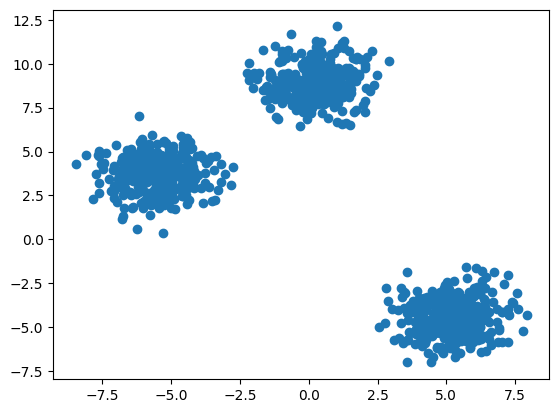

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
X_train.shape

(670, 2)

In [12]:
y_train.shape

(670,)

In [13]:
X_test.shape

(330, 2)

In [14]:
from sklearn.cluster import KMeans

In [15]:
#ELBOW method to select K value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters =k, init= 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[34827.57682552021,
 7935.4372861454185,
 1319.2730531585605,
 1183.8087518707134,
 1038.6566126531825,
 914.3135696755567,
 776.9374334580909,
 828.2267243793137,
 595.45851619475,
 535.6494548542195]

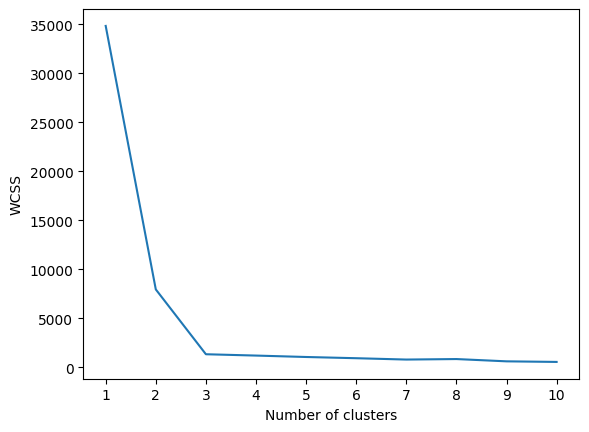

In [17]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = "k-means++")

In [19]:
y_labels = kmeans.fit_predict(X_train)

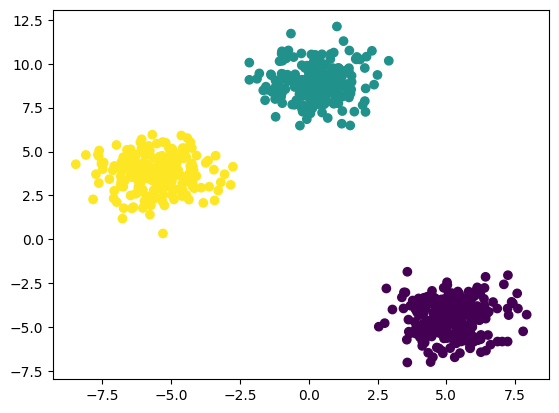

In [20]:
plt.scatter(X_train[:,0],X_train[:,1],c= y_labels)

In [21]:
#knee locator
!pip install kneed


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from  kneed import KneeLocator

In [23]:
k1 = KneeLocator(range(1,11),wcss,curve="convex",direction = "decreasing")

In [24]:
print(k1.elbow)

3


In [25]:
from sklearn.metrics import silhouette_score

In [26]:
kmeans = KMeans(n_clusters =3, init = "k-means++")
kmeans.fit(X_train)
score = silhouette_score(X_train,kmeans.labels_)
print(score)

0.8071181203797672


HIERARCHICAL CLUSTERING

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [28]:
iris = datasets.load_iris()

In [29]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [30]:
df = pd.DataFrame(iris.data)

In [31]:
df.columns = iris.feature_names

In [32]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_scaled = scaler.fit_transform(df)

In [36]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [37]:
X_scaled.shape

(150, 4)

In [38]:
#Apply pca
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components = 2)

In [40]:
pca_scaled = pca.fit_transform(X_scaled)

In [41]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

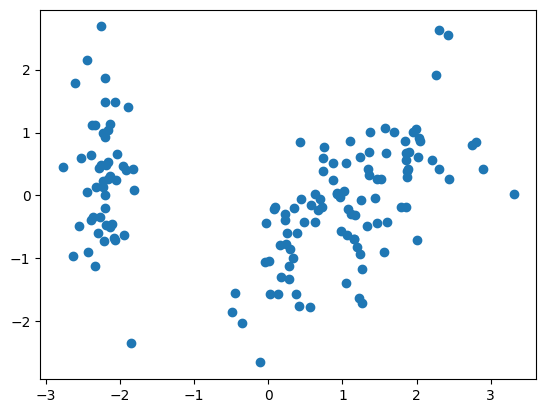

In [42]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

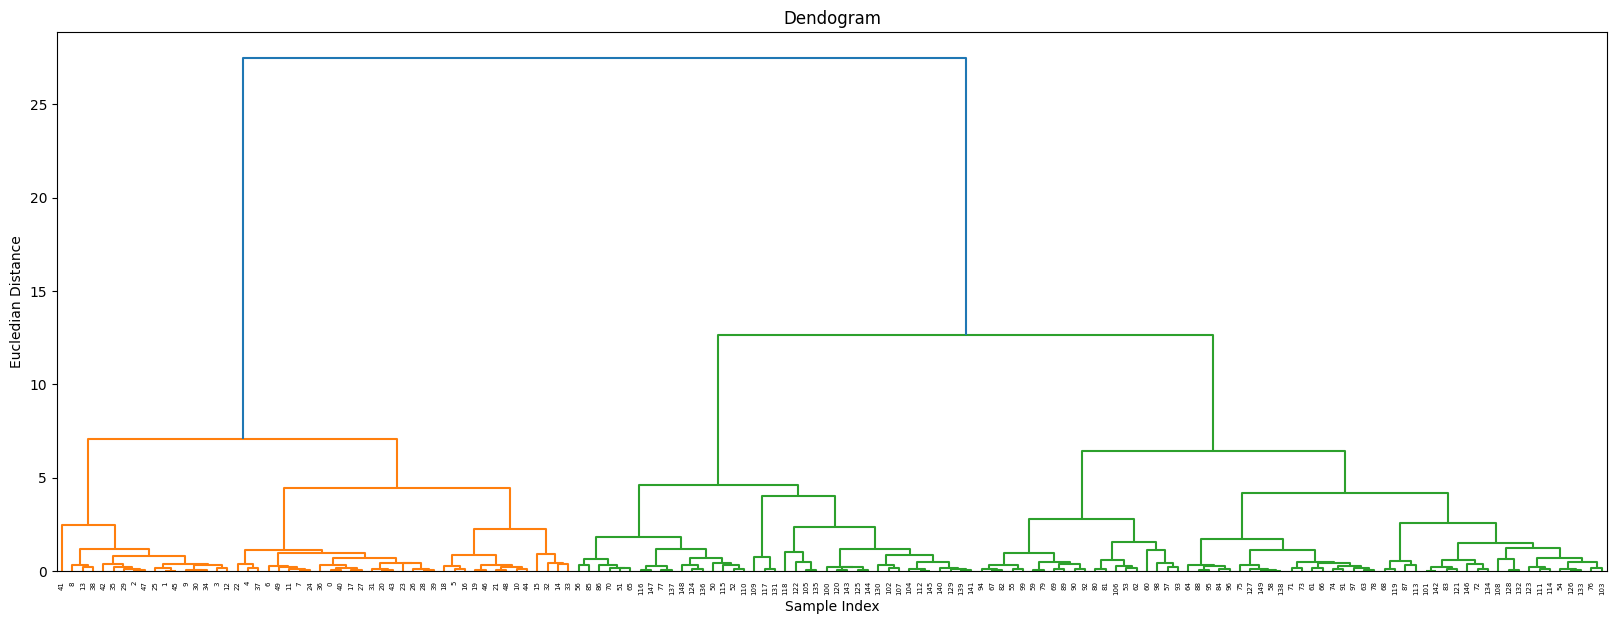

In [43]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))
plt.title("Dendogram")

#create dendorams
sc.dendrogram(sc.linkage(pca_scaled,method="ward"))
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
cluster = AgglomerativeClustering( n_clusters=2, metric="euclidean",linkage="ward")


In [66]:
cluster.fit(pca_scaled)

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [67]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

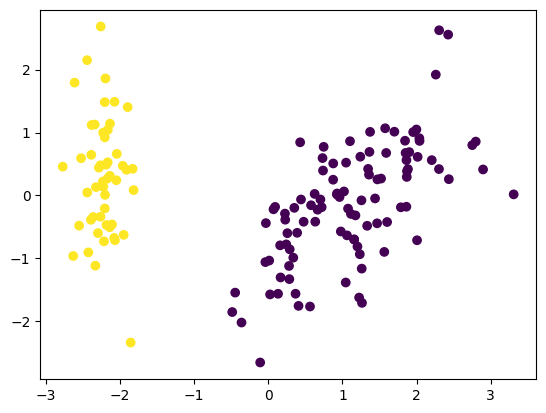

In [68]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [69]:
from sklearn.metrics import silhouette_score

In [70]:
aglo = AgglomerativeClustering( n_clusters=2, metric="euclidean",linkage="ward")

In [71]:
aglo.fit(X_scaled)
score=silhouette_score(X_scaled,aglo.labels_)

In [72]:
print(score)

0.4440870920519339


DBSCAN CLUSTERING IMPLEMENTATION

In [34]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
X,y = make_moons(n_samples = 250,noise=0.10,)

In [36]:
X

array([[ 0.64094797,  0.9417411 ],
       [ 1.49549336, -0.54613   ],
       [ 1.0349316 ,  0.43952805],
       [ 1.16306059, -0.59619691],
       [ 1.49194434, -0.38169848],
       [ 0.33836889, -0.3587026 ],
       [ 0.95098335,  0.58069965],
       [-1.07630664,  0.14287811],
       [ 1.81384304,  0.05619167],
       [ 0.41646106, -0.32419961],
       [ 0.75541624,  0.45891877],
       [ 0.17378553, -0.11584675],
       [ 0.70360076, -0.49678284],
       [ 0.05856351,  0.34146141],
       [-0.02469936,  0.45683533],
       [ 1.88548628, -0.36914558],
       [-0.52690463,  0.80427682],
       [ 1.97705564,  0.4116147 ],
       [-0.79627509,  0.81582813],
       [ 1.00436671, -0.53841218],
       [ 0.8548022 , -0.48707807],
       [ 0.05442391,  0.18467208],
       [ 1.56791496, -0.41108005],
       [ 0.3196527 , -0.27358234],
       [ 1.06737651,  0.41403522],
       [ 0.06597395,  0.39272672],
       [ 0.00573259,  1.1874579 ],
       [ 1.54694166, -0.31557291],
       [ 0.19801847,

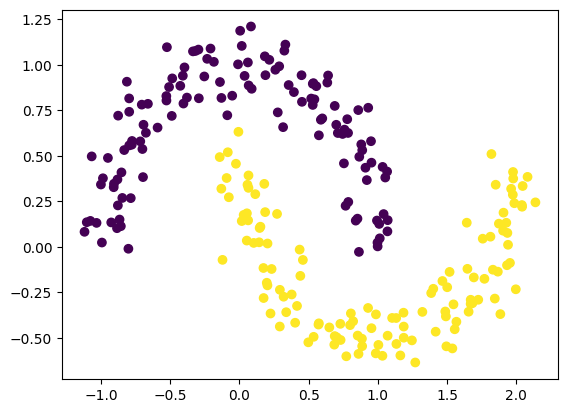

In [37]:
plt.scatter(X[:,0],X[:,1], c =y)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_scaled = scaler.fit_transform(X)

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
dbscan = DBSCAN(eps = 0.5)

In [42]:
dbscan.fit(X_scaled)

,eps,0.5
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [43]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

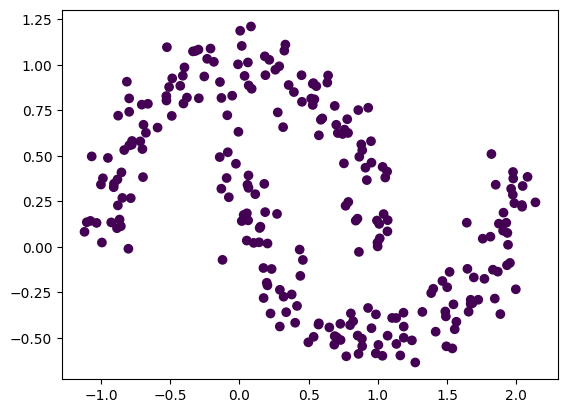

In [44]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

ANOMALY DETECTTION - To detect Outliers

ISOLATION FOREST IMPLEMENTATION

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df.head()

,0,1
0,-1.008040,0.218043
1,-0.628533,-0.661742
2,-0.820234,-0.501173
3,-1.055778,0.839770
4,-0.437893,0.251311


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# --- Parameters ---
n_per_cluster   = 200      # points per main cluster
outlier_fraction = 0.05    # fraction of outliers
cluster_offset   = 5       # distance between clusters

# --- 1️⃣ Generate two clusters ---
# Cluster A centered near (-cluster_offset, 0)
cluster_a = np.random.normal(loc=[-cluster_offset, 0], scale=1.0,
                             size=(n_per_cluster, 2))

# Cluster B centered near (cluster_offset, 0)
cluster_b = np.random.normal(loc=[cluster_offset, 0], scale=1.0,
                             size=(n_per_cluster, 2))

# --- 2️⃣ Combine clusters ---
data = np.vstack([cluster_a, cluster_b])

# --- 3️⃣ Add outliers ---
n_outliers = int((2 * n_per_cluster) * outlier_fraction)
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))
data = np.vstack([data, outliers])

# --- 4️⃣ Standardize (mean=0, std=1) so algorithms see normalized data ---
scaler = StandardScaler()
standardized = scaler.fit_transform(data)

# --- 5️⃣ Put into DataFrame with headers literally "0" and "1" ---
df = pd.DataFrame(standardized, columns=['0', '1'])

# --- 6️⃣ Save to CSV ---
df.to_csv("two_clusters_with_outliers.csv", index=False)

print(df.head())
print(f"Shape: {df.shape}, approx outliers: {n_outliers}")


          0         1
0 -1.033863 -0.591868
1 -0.993045  0.246739
2 -1.149100  0.639132
3 -1.185341  0.754644
4 -0.807874 -0.693488
Shape: (420, 2), approx outliers: 20


In [48]:
df.head()

,0,1
0,-1.033863,-0.591868
1,-0.993045,0.246739
2,-1.149100,0.639132
3,-1.185341,0.754644
4,-0.807874,-0.693488


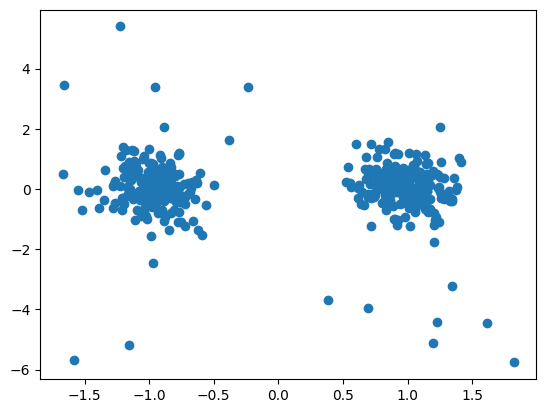

In [49]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [50]:
from sklearn.ensemble import IsolationForest

In [51]:
clf = IsolationForest(contamination = "auto")

In [52]:
clf.fit(df)
prediction = clf.predict(df)

In [53]:
prediction

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [54]:
index = np.where(prediction<0)
index

(array([  5,  13,  16,  21,  46,  62,  72,  76,  82,  95, 106, 110, 126,
        148, 171, 186, 207, 217, 229, 237, 241, 246, 284, 296, 301, 308,
        317, 343, 349, 355, 364, 382, 400, 403, 404, 405, 406, 407, 408,
        409, 410, 411, 412, 413, 415, 416, 417, 418, 419]),)

In [55]:
x = df.values

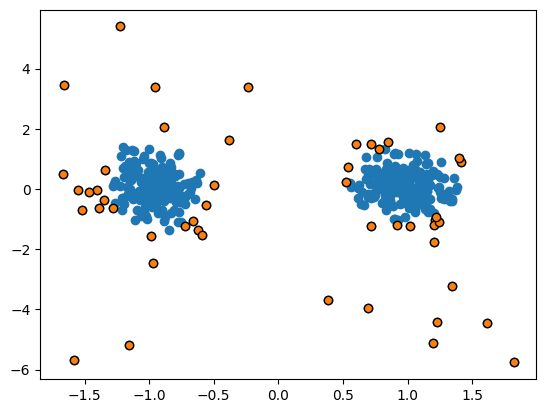

In [57]:
index = np.where(prediction<0)

plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1], edgecolor = "black")

DBSCAN ANOMOLY DETECTION

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
X,y = make_circles(n_samples = 750, factor = 0.3, noise = 0.1)

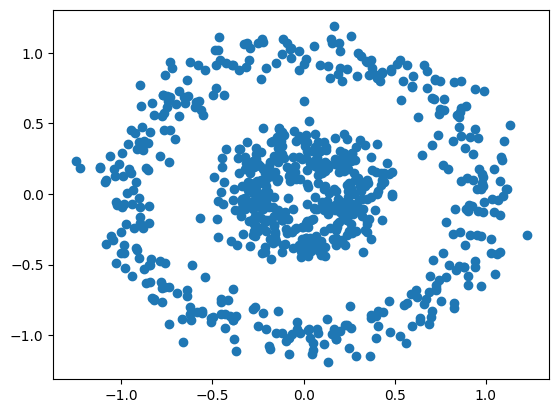

In [60]:
plt.scatter(X[:,0],X[:,1])

In [61]:
dbscan = DBSCAN(eps=0.1)

In [62]:
dbscan.fit_predict(X)

array([ 0,  1,  2,  1,  7,  1,  3,  1,  4,  1,  3, -1,  1, -1, 11,  1,  4,
        1,  1,  1,  5,  1,  1,  1,  6,  1,  1,  6,  1,  5,  3,  2,  1,  1,
        1,  1,  1,  4,  7,  8,  1,  9,  6,  1,  3,  1,  4,  1,  1,  1,  1,
       -1,  1,  1,  4,  1,  1,  3,  1,  1,  1,  1,  1, 10, -1,  1, 10,  9,
        1,  1, 11,  2,  1, -1,  0,  8,  1, 11,  1,  1,  1,  0,  1,  1,  3,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, 10,  1,  1,  1,  3,
        2,  1,  1,  1,  1, -1,  5,  1,  1,  4,  3, -1,  1,  1,  1,  8,  1,
        1, -1,  7, 11,  1, -1,  8, -1,  1,  1, -1,  4,  3,  4,  3,  1,  3,
        3,  3,  2,  1, 13,  8,  4,  3,  3,  1,  1,  1,  1,  3,  1,  0,  1,
        1,  3,  1,  1,  4,  4,  0,  2,  1, -1,  1,  1,  1,  0,  1,  1,  1,
        9, -1,  3,  4, -1,  1,  3,  1,  4,  3,  1, -1,  4,  1,  1,  0,  1,
        2,  5,  0,  3,  7,  4,  1,  4,  7,  4, -1,  1,  2, 10,  1,  1,  4,
        1,  1,  1,  1, -1, 13,  1,  1,  1,  1, -1,  1,  3,  3,  2,  4,  1,
        1,  1,  1,  8,  8

In [63]:
dbscan.labels_

array([ 0,  1,  2,  1,  7,  1,  3,  1,  4,  1,  3, -1,  1, -1, 11,  1,  4,
        1,  1,  1,  5,  1,  1,  1,  6,  1,  1,  6,  1,  5,  3,  2,  1,  1,
        1,  1,  1,  4,  7,  8,  1,  9,  6,  1,  3,  1,  4,  1,  1,  1,  1,
       -1,  1,  1,  4,  1,  1,  3,  1,  1,  1,  1,  1, 10, -1,  1, 10,  9,
        1,  1, 11,  2,  1, -1,  0,  8,  1, 11,  1,  1,  1,  0,  1,  1,  3,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, 10,  1,  1,  1,  3,
        2,  1,  1,  1,  1, -1,  5,  1,  1,  4,  3, -1,  1,  1,  1,  8,  1,
        1, -1,  7, 11,  1, -1,  8, -1,  1,  1, -1,  4,  3,  4,  3,  1,  3,
        3,  3,  2,  1, 13,  8,  4,  3,  3,  1,  1,  1,  1,  3,  1,  0,  1,
        1,  3,  1,  1,  4,  4,  0,  2,  1, -1,  1,  1,  1,  0,  1,  1,  1,
        9, -1,  3,  4, -1,  1,  3,  1,  4,  3,  1, -1,  4,  1,  1,  0,  1,
        2,  5,  0,  3,  7,  4,  1,  4,  7,  4, -1,  1,  2, 10,  1,  1,  4,
        1,  1,  1,  1, -1, 13,  1,  1,  1,  1, -1,  1,  3,  3,  2,  4,  1,
        1,  1,  1,  8,  8

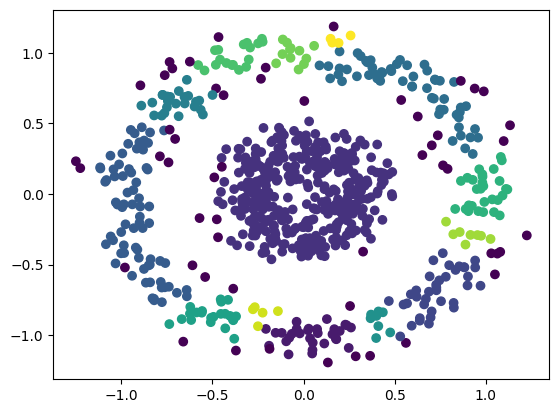

In [64]:
plt.scatter(X[:,0],X[:,1],c= dbscan.labels_)

LOCAL OULIER DETECTION

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [66]:
np.random.seed(42)
X= np.random.randn(100,2)
X[50] = [8,8] #introduce an outlier


In [67]:
X

array([[ 4.96714153e-01, -1.38264301e-01],
       [ 6.47688538e-01,  1.52302986e+00],
       [-2.34153375e-01, -2.34136957e-01],
       [ 1.57921282e+00,  7.67434729e-01],
       [-4.69474386e-01,  5.42560044e-01],
       [-4.63417693e-01, -4.65729754e-01],
       [ 2.41962272e-01, -1.91328024e+00],
       [-1.72491783e+00, -5.62287529e-01],
       [-1.01283112e+00,  3.14247333e-01],
       [-9.08024076e-01, -1.41230370e+00],
       [ 1.46564877e+00, -2.25776300e-01],
       [ 6.75282047e-02, -1.42474819e+00],
       [-5.44382725e-01,  1.10922590e-01],
       [-1.15099358e+00,  3.75698018e-01],
       [-6.00638690e-01, -2.91693750e-01],
       [-6.01706612e-01,  1.85227818e+00],
       [-1.34972247e-02, -1.05771093e+00],
       [ 8.22544912e-01, -1.22084365e+00],
       [ 2.08863595e-01, -1.95967012e+00],
       [-1.32818605e+00,  1.96861236e-01],
       [ 7.38466580e-01,  1.71368281e-01],
       [-1.15648282e-01, -3.01103696e-01],
       [-1.47852199e+00, -7.19844208e-01],
       [-4.

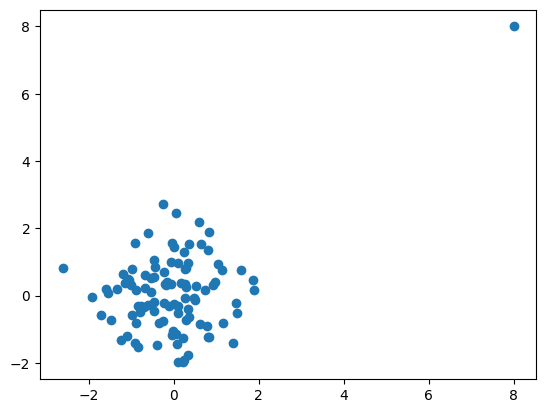

In [68]:
plt.scatter(X[:,0],X[:,1])

In [69]:
clf =LocalOutlierFactor(n_neighbors =20,contamination=0.1)

In [70]:
y_pred = clf.fit_predict(X)

In [71]:
y_pred

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

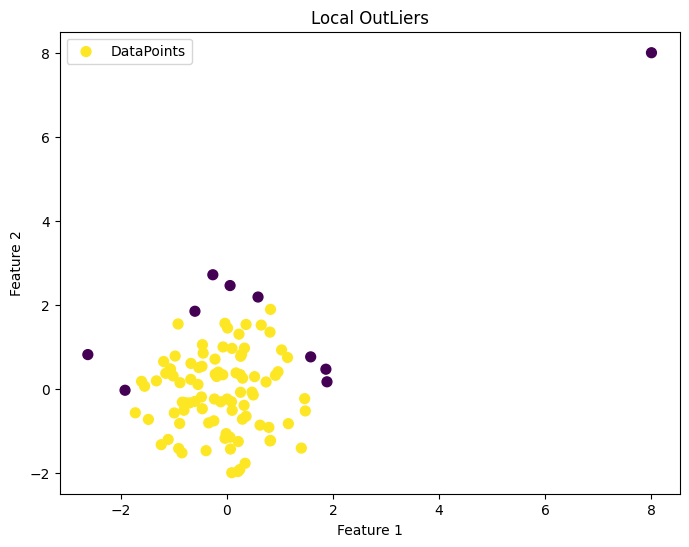

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap  = "viridis",s=50,label="DataPoints")
plt.title("Local OutLiers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

TIME SERIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
df = pd.read_csv("TSLA.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.shape

(2956, 7)

In [6]:
stock_data = df[["Date","Close"]]

In [7]:
stock_data

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2956 non-null   object 
 1   Close   2956 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.3+ KB


In [9]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3384\1075770006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"] = pd.to_datetime(stock_data["Date"])


In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2956 non-null   datetime64[ns]
 1   Close   2956 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.3 KB


In [17]:
stock_data.head(2)

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766


why we are convertin datecolumn to index
1) easily retrive data
2)data visualization
3)those library has been design in such way that it required date column

In [18]:
stock_data = stock_data.set_index("Date")

KeyError: "None of ['Date'] are in the columns"

In [19]:
stock_data

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


EDA

In [20]:
stock_data.describe()

,Close
count,2956.000000
mean,138.762183
std,250.123115
min,3.160000
25%,19.615000
50%,46.545000
75%,68.103998
max,1229.910034


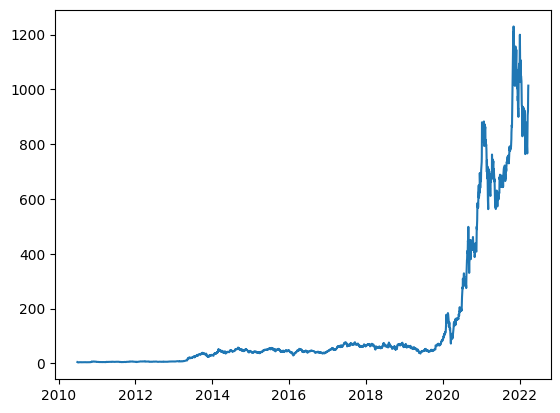

In [21]:
plt.plot(stock_data.Close)

(array([2435.,   86.,   33.,   64.,   36.,  130.,   74.,   41.,   42.,
          15.]),
 array([   3.16     ,  125.8350034,  248.5100068,  371.1850102,
         493.8600136,  616.535017 ,  739.2100204,  861.8850238,
         984.5600272, 1107.2350306, 1229.910034 ]),
 <BarContainer object of 10 artists>)

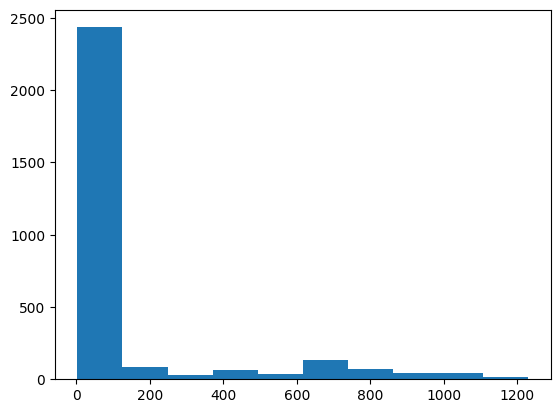

In [22]:
plt.hist(stock_data.Close)

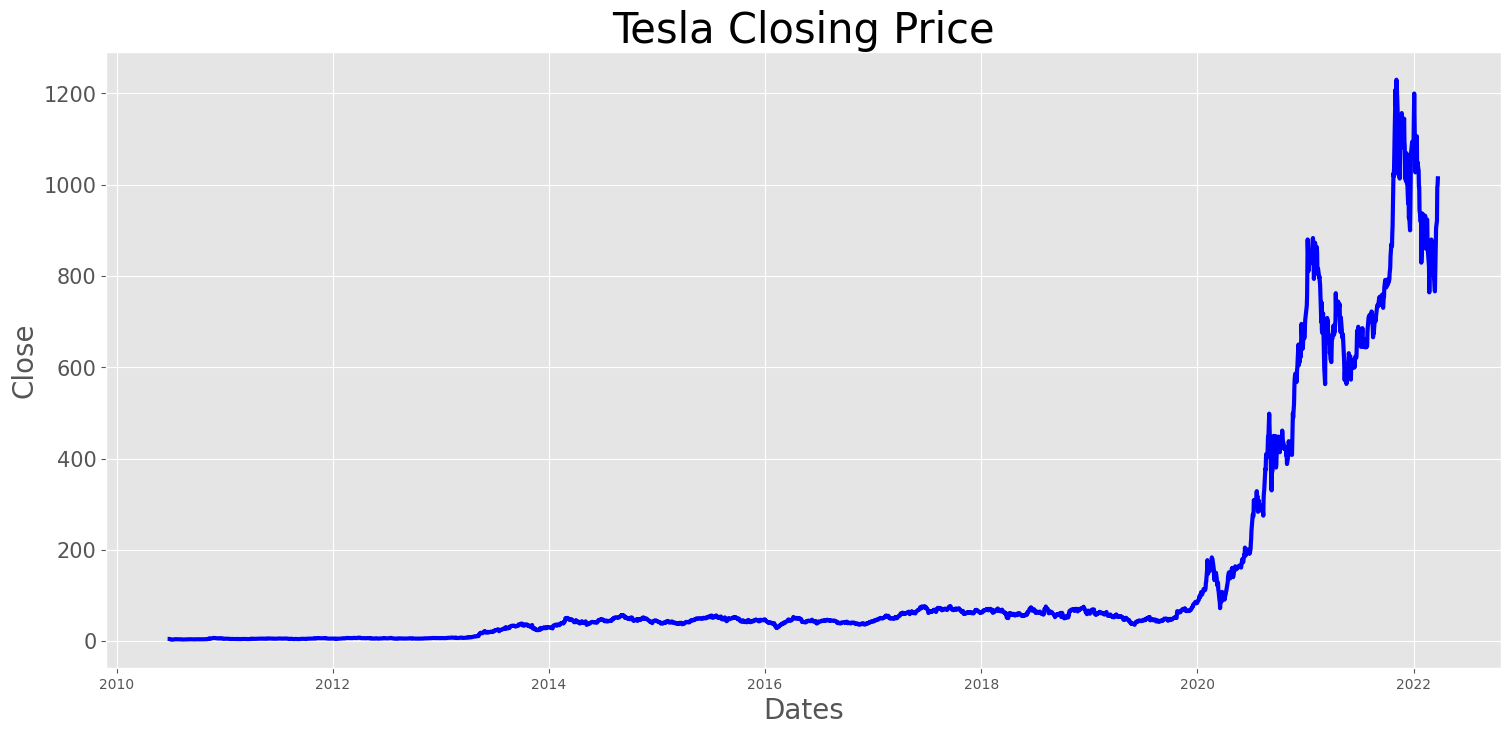

In [23]:
plt.style.use("ggplot")
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.ylabel("Close",fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data["Close"],linewidth=3,color="blue")
plt.title("Tesla Closing Price",fontsize=30)
plt.show()

In [29]:
rollmean = stock_data["Close"].rolling(48).mean()

In [30]:
rollstd =stock_data["Close"].rolling(48).std()

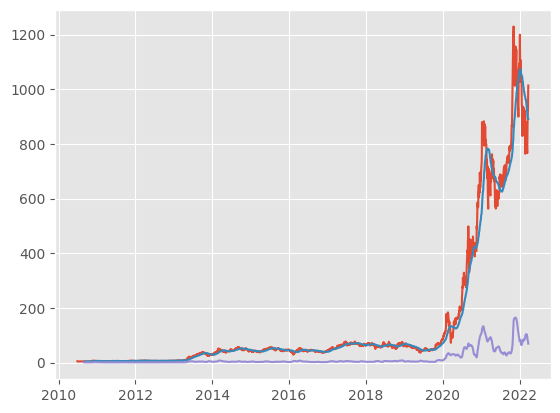

In [31]:
plt.plot(stock_data.Close)
plt.plot(rollmean)
plt.plot(rollstd)

In [37]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data["Close"])

In [38]:
pd.Series(adft[0:4],index = ["test_stats","p_value","lag","data_poitns"])

test_stats        1.423942
p_value           0.997220
lag              28.000000
data_poitns    2927.000000
dtype: float64

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data["Close"],period = 12)

In [40]:
result.seasonal

Date
2010-06-29   -0.795449
2010-06-30    0.078115
2010-07-01    1.258012
2010-07-02    0.980713
2010-07-06    0.806705
                ...   
2022-03-18   -0.453949
2022-03-21   -0.795449
2022-03-22    0.078115
2022-03-23    1.258012
2022-03-24    0.980713
Name: seasonal, Length: 2956, dtype: float64

<Figure size 2000x1000 with 0 Axes>

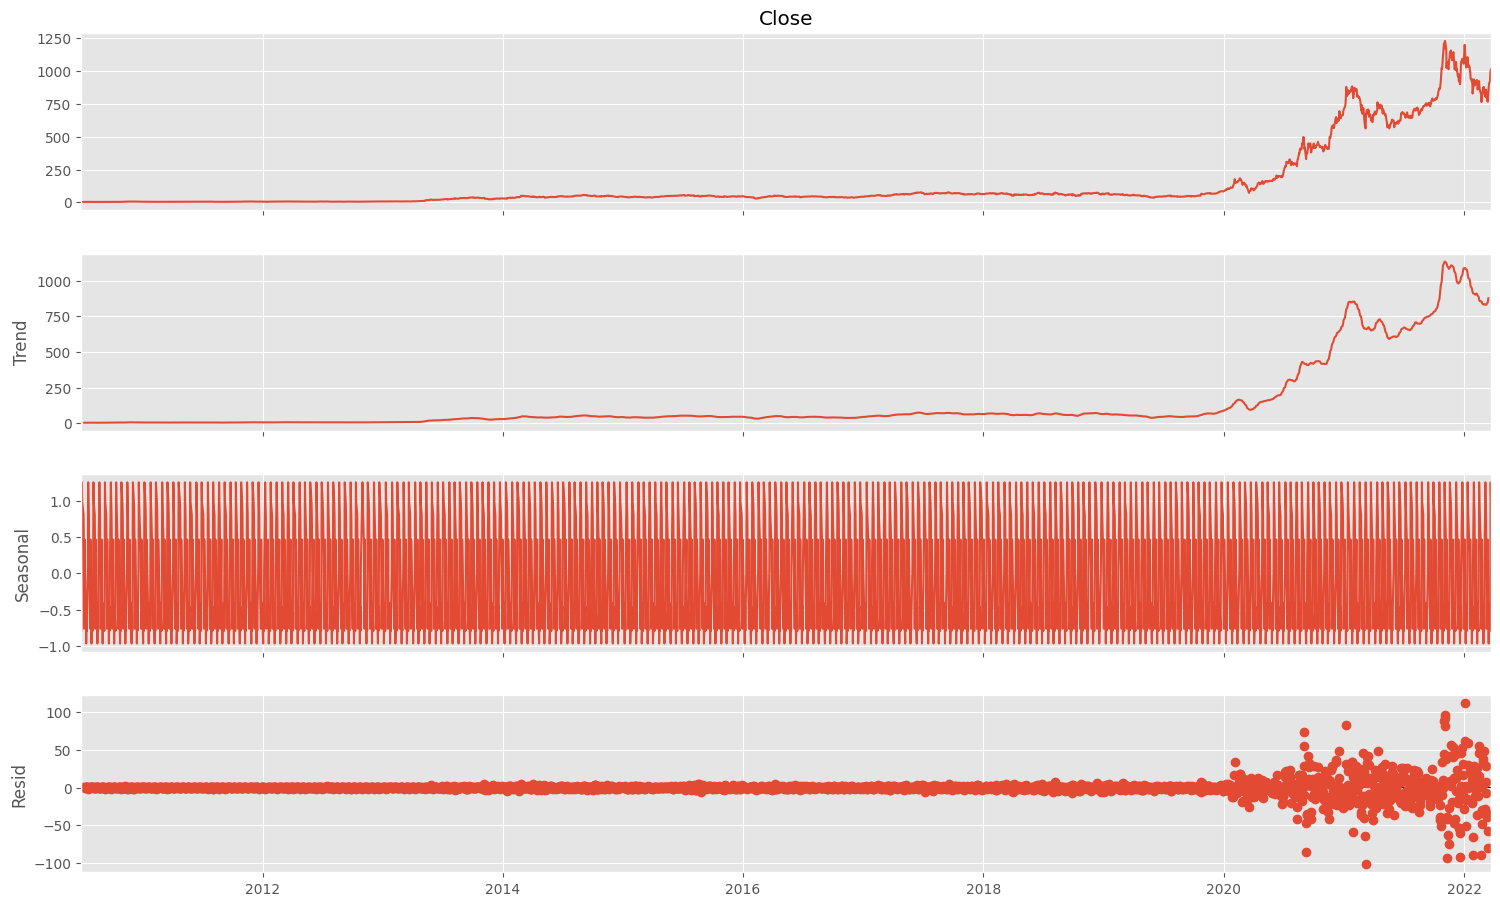

In [41]:
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]],period = 12,model = "multiplicative")

<Figure size 2000x1000 with 0 Axes>

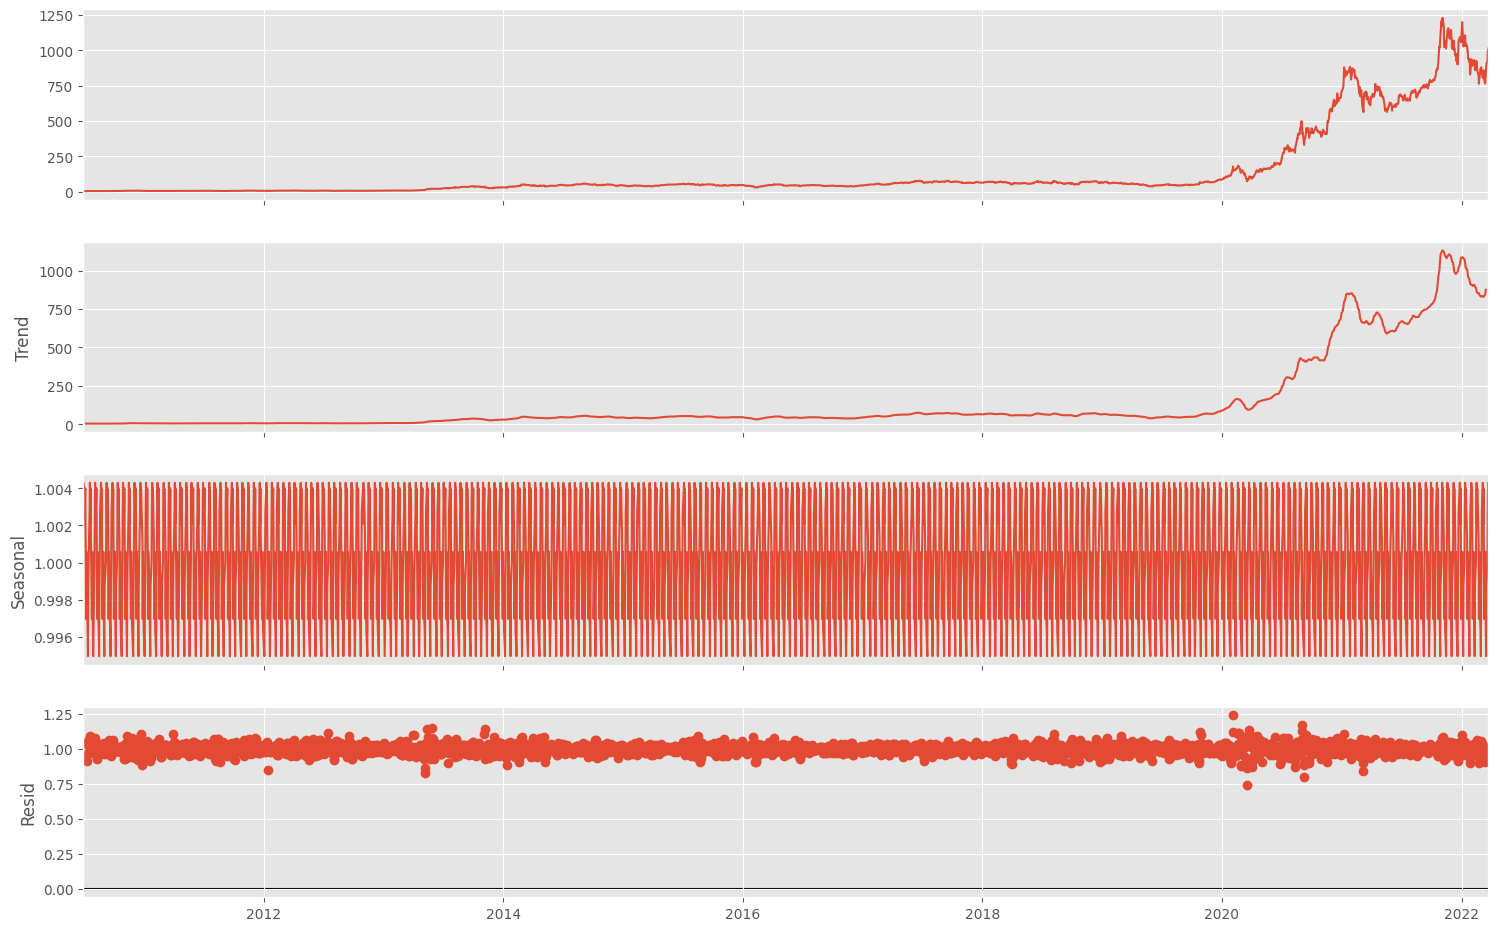

In [43]:
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<Axes: ylabel='Close'>

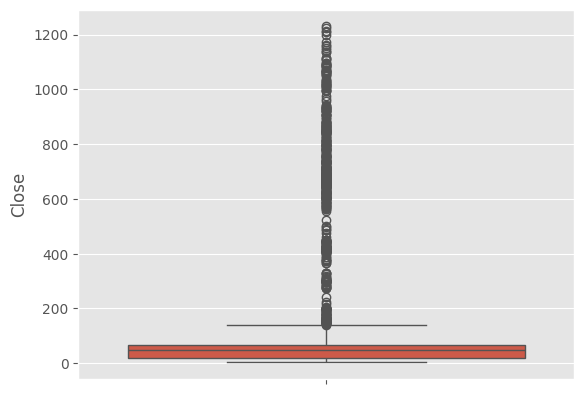

In [44]:
import seaborn as sns
sns.boxplot(stock_data.Close)

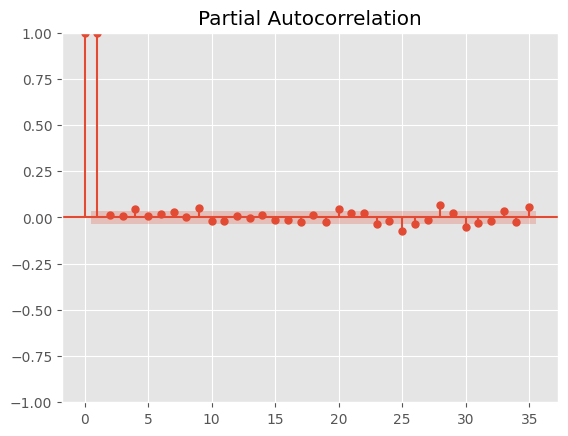

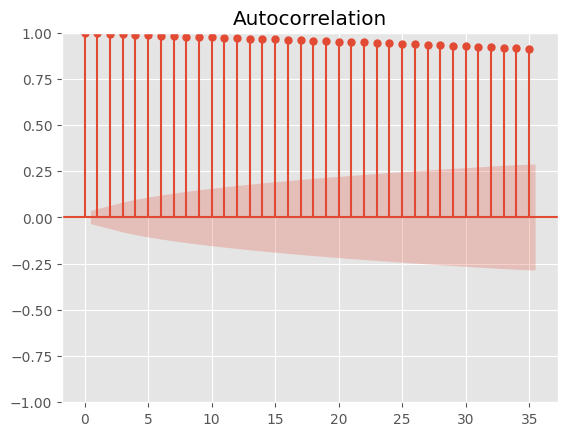

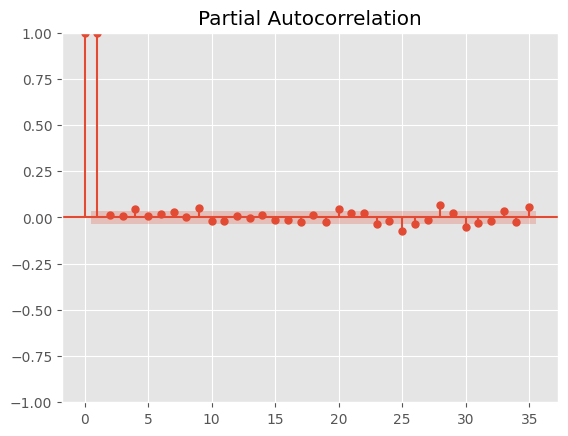

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [46]:
df_close = stock_data["Close"]

In [47]:
df_close

Date
2010-06-29       4.778000
2010-06-30       4.766000
2010-07-01       4.392000
2010-07-02       3.840000
2010-07-06       3.222000
                 ...     
2022-03-18     905.390015
2022-03-21     921.159973
2022-03-22     993.979980
2022-03-23     999.109985
2022-03-24    1013.919983
Name: Close, Length: 2956, dtype: float64

In [48]:
df_close = df_close.diff()

In [49]:
df_close =df_close.dropna()

In [50]:
df_close

Date
2010-06-30    -0.012000
2010-07-01    -0.374000
2010-07-02    -0.552000
2010-07-06    -0.618000
2010-07-07    -0.062000
                ...    
2022-03-18    33.790039
2022-03-21    15.769958
2022-03-22    72.820007
2022-03-23     5.130005
2022-03-24    14.809998
Name: Close, Length: 2955, dtype: float64

In [51]:
test_stationarity(df_close)

NameError: name 'test_stationarity' is not defined

In [52]:
df_close[-60:]

Date
2021-12-29     -2.280030
2021-12-30    -15.849975
2021-12-31    -13.559937
2022-01-03    143.000000
2022-01-04    -50.190063
2022-01-05    -61.469971
2022-01-06    -23.420044
2022-01-07    -37.739990
2022-01-10     31.160034
2022-01-11      6.280029
2022-01-12     41.819947
2022-01-13    -74.659912
2022-01-14     18.049926
2022-01-18    -19.099975
2022-01-19    -34.859986
2022-01-20      0.619996
2022-01-21    -52.369996
2022-01-24    -13.900024
2022-01-25    -11.599976
2022-01-26     19.009949
2022-01-27   -108.309997
2022-01-28     17.250000
2022-01-31     90.369995
2022-02-01     -5.469971
2022-02-02    -25.590027
2022-02-03    -14.519958
2022-02-04     32.179992
2022-02-07    -15.979980
2022-02-08     14.659973
2022-02-09     10.000000
2022-02-10    -27.450012
2022-02-11    -44.549988
2022-02-14     15.760010
2022-02-15     46.669983
2022-02-16      0.960022
2022-02-17    -47.040039
2022-02-18    -19.369996
2022-02-22    -35.449951
2022-02-23    -57.490051
2022-02-24     36.73

In [53]:
df_close[:-60]

Date
2010-06-30    -0.012000
2010-07-01    -0.374000
2010-07-02    -0.552000
2010-07-06    -0.618000
2010-07-07    -0.062000
                ...    
2021-12-21    38.590027
2021-12-22    70.339966
2021-12-23    58.130005
2021-12-27    26.939941
2021-12-28    -5.469970
Name: Close, Length: 2895, dtype: float64

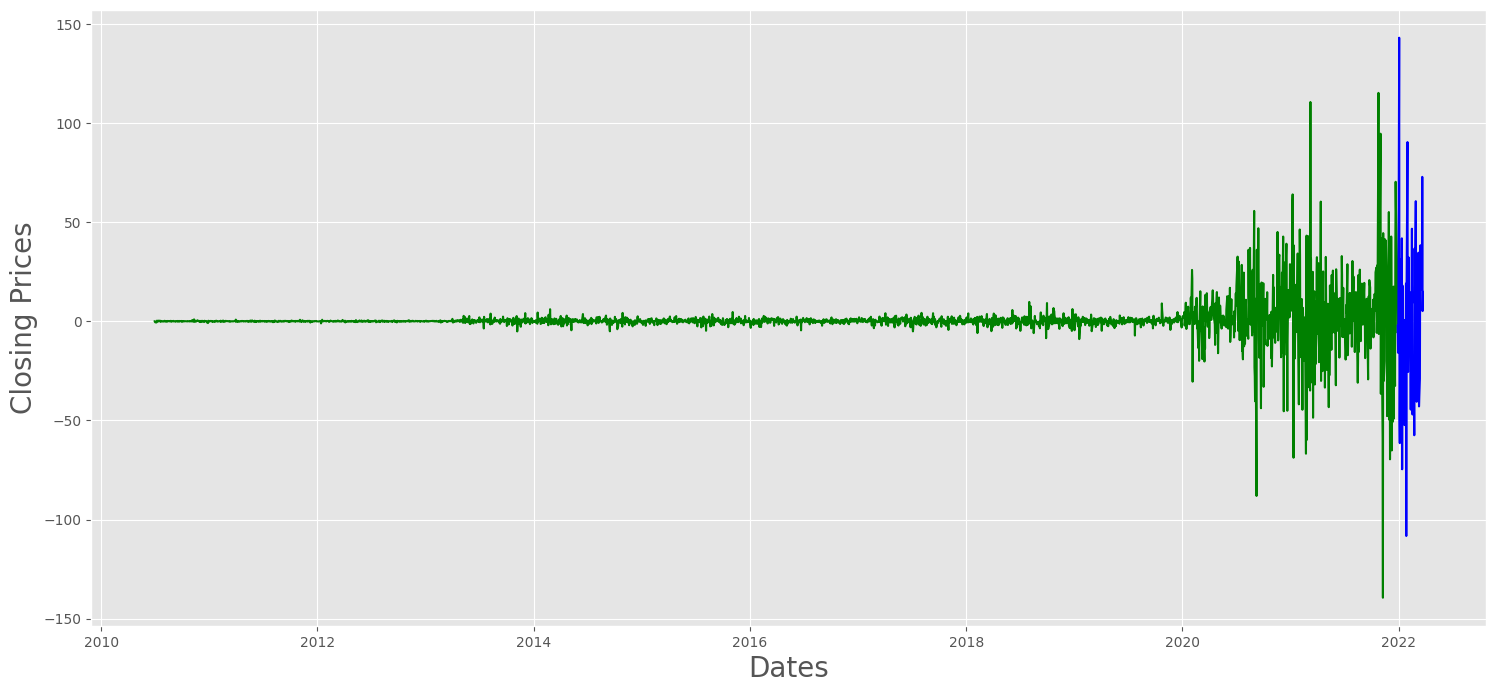

In [54]:
train_data = df_close[0:-60]
test_data = df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel("Closing Prices", fontsize = 20)
plt.plot(train_data,"green",label="Train Data")
plt.plot(test_data,"blue",label="Test Data")

Model Building

In [55]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [56]:
history = [x for x in train_data]

In [57]:
history

[-0.011999999999999567,
 -0.37399999999999967,
 -0.5520000000000005,
 -0.6179999999999999,
 -0.06199999999999983,
 0.33199999999999985,
 -0.01200000000000001,
 -0.06999999999999984,
 0.21799999999999997,
 0.33999999999999986,
 0.010000000000000231,
 0.1499999999999999,
 0.25399999999999956,
 -0.32200000000000006,
 -0.016000000000000014,
 0.15600000000000058,
 0.05799999999999983,
 -0.06799999999999962,
 -0.08000000000000007,
 0.03399999999999981,
 -0.07399999999999984,
 -0.0820000000000003,
 0.19600000000000017,
 0.20599999999999952,
 -0.1379999999999999,
 -0.16199999999999992,
 -0.1719999999999997,
 0.0019999999999997797,
 -0.11399999999999988,
 -0.22599999999999998,
 -0.06000000000000005,
 0.14400000000000013,
 0.09199999999999964,
 0.07400000000000029,
 -0.07600000000000007,
 0.0040000000000000036,
 0.06199999999999983,
 0.20599999999999996,
 -0.18599999999999994,
 0.14000000000000012,
 -0.029999999999999805,
 -0.010000000000000231,
 0.03400000000000025,
 -0.07800000000000029,
 0.19

In [58]:
model = ARIMA(history,order= (1,1,1))

In [59]:
model = model.fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2895
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10660.608
Date:                Thu, 04 Dec 2025   AIC                          21327.217
Time:                        19:02:16   BIC                          21345.128
Sample:                             0   HQIC                         21333.671
                               - 2895                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0089      0.005     -1.635      0.102      -0.020       0.002
ma.L1         -0.9969      0.001  -1707.551      0.000      -0.998      -0.996
sigma2        92.5486      0.518    178.523      0.000      91.533      93.565
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            266489.94
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             617.46   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        50.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
model.forecast()[0]

np.float64(1.8071273200405296)

In [62]:
test_data[0]

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3384\2395562395.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_data[0]


np.float64(-2.280029999999897)

In [63]:
mean_squared_error([test_data[0]],model.forecast())

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3384\3878667994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]],model.forecast())


16.70485495876004

In [64]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3384\2013795996.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]],model.forecast()))


np.float64(4.0871573200404265)